In [1]:
import numpy as np
import timeit
import viscid_step as viscid

argsdict=viscid.argsdict
import importlib as imp
from scipy.linalg import eig
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt
import json
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

### Dispersion relations and band gap for the inviscid problem

In [5]:
a=0.1
argsdict['dim']=2
argsdict['Nx']=3
argsdict['Ny']=3
argsdict['Nt']=3
argsdict['k1x']=np.pi*a
argsdict['k1y']=0
argsdict['k2x']=-np.pi/2*a
argsdict['k2y']=3**0.5/2*np.pi*a
argsdict['h0']=1.0
argsdict['As']=0.75

In [6]:
argsdict['rho']=1.0
argsdict['sigma']=72

imp.reload(viscid)
num=50

start=timeit.default_timer()
kxs1=np.arange(1,num+1)/num*argsdict['k1x']/2
kys1=np.arange(1,num+1)/num*0

argsdict['As']=0.0
evalssweep1=[]
revecssweep1=[]
levecssweep1=[]
for i in range(num):
    argsdict['kx']=kxs1[i]
    argsdict['ky']=kys1[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep1=evalssweep1+[evals]
    revecssweep1=revecssweep1+[revecs]
    levecssweep1=levecssweep1+[levecs]
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
kxs2=argsdict['k1x']/2+np.arange(1,num+1)/num*((2*argsdict['k1x'] + argsdict['k2x'])/3 - argsdict['k1x']/2)
kys2=argsdict['k1y']/2+np.arange(1,num+1)/num*((2*argsdict['k1y'] + argsdict['k2y'])/3 - argsdict['k1y']/2)
evalssweep2=[]
revecssweep2=[]
levecssweep2=[]
for i in range(num-1):
    argsdict['kx']=kxs2[i]
    argsdict['ky']=kys2[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep2=evalssweep2+[evals]
    revecssweep2=revecssweep2+[revecs]
    levecssweep2=levecssweep2+[levecs]
    
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
kxs3=np.arange(1,num)/num*((2*argsdict['k1x'] + argsdict['k2x'])/3)
kys3=np.arange(1,num)/num*((2*argsdict['k1y'] + argsdict['k2y'])/3)
evalssweep3=[]
revecssweep3=[]
levecssweep3=[]
for i in range(num-1):
    argsdict['kx']=kxs3[i]
    argsdict['ky']=kys3[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep3=evalssweep3+[evals]
    revecssweep3=revecssweep3+[revecs]
    levecssweep3=levecssweep3+[levecs]

stop=timeit.default_timer()
print(stop-start)

vals1=np.sort(np.real((np.array(evalssweep1))**0.5/(2*np.pi)),axis=1)
vals2=np.sort(np.real((np.array(evalssweep2))**0.5/(2*np.pi)),axis=1)
vals3=np.flip(np.sort(np.real((np.array(evalssweep3))**0.5/(2*np.pi)),axis=1),axis=0)

argsdict['As']=0.75
evalssweep12=[]
revecssweep12=[]
levecssweep12=[]
for i in range(len(kxs1)):
    argsdict['kx']=kxs1[i]
    argsdict['ky']=kys1[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep12=evalssweep12+[evals]
    revecssweep12=revecssweep12+[revecs]
    levecssweep12=levecssweep12+[np.conjugate(levecs)]
    
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
kxs2=argsdict['k1x']/2+np.arange(1,num+1)/num*((2*argsdict['k1x'] + argsdict['k2x'])/3 - argsdict['k1x']/2)
kys2=argsdict['k1y']/2+np.arange(1,num+1)/num*((2*argsdict['k1y'] + argsdict['k2y'])/3 - argsdict['k1y']/2)
evalssweep22=[]
revecssweep22=[]
levecssweep22=[]
for i in range(len(kxs2)):
    argsdict['kx']=kxs2[i]
    argsdict['ky']=kys2[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)    
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep22=evalssweep22+[evals]
    revecssweep22=revecssweep22+[revecs]
    levecssweep22=levecssweep22+[np.conjugate(levecs)]
    
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
kxs3=np.arange(1,num)/num*((2*argsdict['k1x'] + argsdict['k2x'])/3)
kys3=np.arange(1,num)/num*((2*argsdict['k1y'] + argsdict['k2y'])/3)
evalssweep32=[]
revecssweep32=[]
levecssweep32=[]
for i in range(len(kxs3)):
    argsdict['kx']=kxs3[i]
    argsdict['ky']=kys3[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)    
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep32=evalssweep32+[evals]
    revecssweep32=revecssweep32+[revecs]
    levecssweep32=levecssweep32+[np.conjugate(levecs)]

stop=timeit.default_timer()
print(stop-start)

vals12=np.sort(np.real((np.array(evalssweep12))**0.5/(2*np.pi)),axis=1)
vals22=np.sort(np.real((np.array(evalssweep22))**0.5/(2*np.pi)),axis=1)
vals32=np.flip(np.sort(np.real((np.array(evalssweep32))**0.5/(2*np.pi)),axis=1),axis=0)


0.3282017420278862
0.3212935070041567
0.4356081419973634
0.9468701809528284
0.5011983430013061
0.4940342900226824


1.790898713446387 1.5602729307919136
[1.56027293 1.56027293]
1.5160852591890681 1.5738853625642166
[1.25028421 1.57388536]


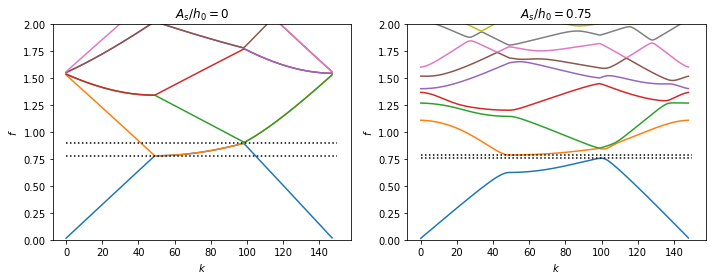

In [18]:
plt.subplots(1,2,figsize=(10,4))

plt.subplot(1,2,1)

plt.ylim(0,2)
plt.plot(np.concatenate([vals1,vals2,vals3]))
plt.plot([0,150],[np.max(np.concatenate([vals1,vals2,vals3])[:,0]),np.max(np.concatenate([vals1,vals2,vals3])[:,0])],ls=':',c='black')
plt.plot([0,150],[np.min(np.concatenate([vals1,vals2,vals3])[:,1]),np.min(np.concatenate([vals1,vals2,vals3])[:,1])],ls=':',c='black')

print(2*np.max(np.concatenate([vals1,vals2,vals3])[:,0]),2*np.min(np.concatenate([vals1,vals2,vals3])[:,1]))
print(vals1[-1][:2]*2)
plt.xlabel('$k$')
plt.ylabel('$f$')
plt.title('$A_s/h_0=0$')

plt.subplot(1,2,2)
plt.ylim(0,2)
plt.plot(np.concatenate([vals12,vals22,vals32]))
plt.plot([0,150],[np.max(np.concatenate([vals12,vals22,vals32])[:,0]),np.max(np.concatenate([vals12,vals22,vals32])[:,0])],ls=':',c='black')
plt.plot([0,150],[np.min(np.concatenate([vals12,vals22,vals32])[:,1]),np.min(np.concatenate([vals12,vals22,vals32])[:,1])],ls=':',c='black')

print(2*np.max(np.concatenate([vals12,vals22,vals32])[:,0]),2*np.min(np.concatenate([vals12,vals22,vals32])[:,1]))
print(vals12[-1][:2]*2)
plt.xlabel('$k$')
plt.ylabel('$f$')
plt.title('$A_s/h_0=%.2f$'%(argsdict['As']))


plt.tight_layout()
plt.savefig('dispersion.pdf')
plt.show()

### Pseudoarclength continuation shows inviscid subharmonic wave mixing and resonance

In [27]:
argsdict['epstp']=0.1

In [28]:
imp.reload(viscid)
def mat(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (E.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F.reshape(shape))+argsdict['ad']*D.reshape(shape)).reshape((n_flat,n_flat))
def mat2(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (-2*(omega+ls*argsdict['freq']*2*np.pi)*(F.reshape(shape))).reshape((n_flat,n_flat))
def mat3(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    return D

evalssweeps=[evalssweep12,evalssweep22,np.flip(evalssweep32,axis=0)]
revecssweeps=[revecssweep12,revecssweep22,np.flip(revecssweep32,axis=0)]
levecssweeps=[levecssweep12,levecssweep22,np.flip(levecssweep32,axis=0)]
kxss=[kxs1,kxs2,np.flip(kxs3)]
kyss=[kys1,kys2,np.flip(kys3)]


imp.reload(viscid)
kind=48
argsdict['kx']=np.concatenate(kxss)[kind]
argsdict['ky']=np.concatenate(kyss)[kind]
argsdict['ad']=0
argsdict['freq']=1.25
argsdict['verbose']=1
argsdict['epss']=0
argsdict['dsmin']=1E-12

order=np.argsort(np.concatenate(evalssweeps)[kind])

omega1=np.concatenate(evalssweeps)[kind][order[0]]**0.5+1j*1E-8
v1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
v1[argsdict['Nt']]=np.concatenate(revecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
v1=v1.ravel()
w1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
w1[argsdict['Nt']]=np.concatenate(levecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
w1=w1.ravel()

omegans1,vns1,wns1=viscid.rayleigh_mat(omega1,v1,w1,mat,argsdict)
argsdict['par']='ad'
argsdict['pari']=0
argsdict['parf']=0.1
argsdict['dsmax']=1E-3
argsdict['ds']=1E-3
omegas,vs,ws,pars,dirs=viscid.pseudocont2(omegans1[-1],vns1[-1],wns1[-1],mat,argsdict,mat2=mat2,mat3=mat3)

n=0 dv=5.827882e-03 dw=5.827882e-03 dl=2.082479e-03
n=1 dv=2.639574e-16 dw=4.352220e-16 dl=2.080863e-03
n=2 dv=5.613246e-16 dw=2.213427e-16 dl=2.717283e-06
newdir=(-0.000,0.000,0.990)
step=0 ds=1.000000e-03 ad=0.000000 lambda=3.920097+i-0.000000 dir=(-0.000, 0.000, 0.990)
n=0 dv=5.086e-03 dlambda=5.633e-05 dmu=3.843e-07 ad=0.000990 lr=3.920374 li=-0.000000 mstp=3.639e-02
n=1 dv=1.361e-05 dlambda=2.143e-08 dmu=1.842e-07 ad=0.000990 lr=3.920374 li=0.000000 mstp=3.640e-02
m=0 direrr=4.178e-16 res=1.964e-12
deltadir=9.232e-02 stp=(0.277,0.000,0.990) newdir=(0.492, 0.000, 0.861)
ds=1.000e-03 ad=0.000990 lambda=3.920374+0.000000i stp=(0.277,0.000,0.990) mstp=3.640e-02
step=1 ds=1.000000e-03 ad=0.000990 lambda=3.920374+i0.000000 dir=(0.267, 0.000, 0.954)
n=0 dv=9.858e-03 dlambda=9.039e-05 dmu=1.237e-04 ad=0.001820 lr=3.921086 li=0.000000 mstp=9.236e-02
n=1 dv=3.787e-05 dlambda=1.096e-07 dmu=4.568e-07 ad=0.001820 lr=3.921087 li=0.000000 mstp=9.240e-02
m=0 direrr=1.070e-14 res=2.748e-12
deltadi

n=2 dv=3.580e-06 dlambda=3.672e-09 dmu=4.967e-08 ad=-0.000646 lr=3.933768 li=-0.000000 mstp=1.460e-01
n=3 dv=3.590e-11 dlambda=3.681e-14 dmu=4.980e-13 ad=-0.000646 lr=3.933768 li=-0.000000 mstp=1.460e-01
n=4 dv=3.285e-15 dlambda=9.498e-17 dmu=4.606e-17 ad=-0.000646 lr=3.933768 li=0.000000 mstp=1.460e-01
n=5 dv=8.094e-16 dlambda=6.970e-17 dmu=2.663e-17 ad=-0.000646 lr=3.933768 li=-0.000000 mstp=1.460e-01
n=6 dv=2.426e-15 dlambda=5.406e-17 dmu=4.271e-17 ad=-0.000646 lr=3.933768 li=-0.000000 mstp=1.460e-01
n=7 dv=5.971e-17 dlambda=5.791e-17 dmu=1.064e-17 ad=-0.000646 lr=3.933768 li=-0.000000 mstp=1.460e-01
n=8 dv=2.252e-16 dlambda=7.856e-17 dmu=3.126e-18 ad=-0.000646 lr=3.933768 li=0.000000 mstp=1.460e-01
n=9 dv=1.649e-15 dlambda=1.473e-17 dmu=4.563e-17 ad=-0.000646 lr=3.933768 li=0.000000 mstp=1.460e-01
Convergence failure!
ds=5.000e-04 dv=1.649e-15 dlambda=1.473e-17 dmu=4.563e-17 stp=(-0.044,-0.000,-1.158) mstp=1.460e-01
step=16 ds=5.000000e-04 ad=0.000512 lambda=3.933812+i0.000000 dir=

### Switch branches at the bifurcation point

In [32]:
imp.reload(viscid)

fomega=interp1d(np.arange(len(omegas)),omegas,kind='cubic')
fv=interp1d(np.arange(len(omegas)),np.array(vs).T,kind='cubic')
fw=interp1d(np.arange(len(omegas)),np.array(ws).T,kind='cubic')
fpar=interp1d(np.arange(len(omegas)),pars,kind='cubic')
fdir=interp1d(np.arange(len(omegas)),np.array(dirs).T,kind='cubic')


ind=np.where(np.diff(pars)<0)[0][0]
find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-2,ind)).x

omega0=complex(fomega(find))
v0=fv(find)
w0=fw(find)
dir0=fdir(find)
argsdict[argsdict['par']]=float(fpar(find))

s=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
newdir=np.zeros(dir0.shape)
newdir[:s]=dir0[s:2*s]
newdir[s:2*s]=-dir0[:s]
newdir[2*s]=dir0[2*s+1]
newdir[2*s+1]=-dir0[2*s]
newdir[2*s+2]=2*dir0[2*s+2]
dir0=newdir

argsdict['itmax']=5
argsdict['pari']=0.0
argsdict['parf']=0.05
argsdict['ds']=1E-3
argsdict['dsmax']=1E-3
argsdict['dsmin']=1E-10
omegas3,vs3,ws3,pars3,dirs3=viscid.pseudocont2(omega0,v0,w0,mat,argsdict,mat2=mat2,mat3=mat3,dir=dir0)
argsdict['ds']*=-1
argsdict[argsdict['par']]=pars3[-2]
omegas4,vs4,ws4,pars4,dirs4=viscid.pseudocont2(omegas3[-2],vs3[-2],ws3[-2],mat,argsdict,mat2=mat2,mat3=mat3,dir=dirs3[-1])


step=0 ds=1.000000e-03 ad=0.003526 lambda=3.926991+i-0.000000 dir=(-0.000, -0.995, 0.074)
n=0 dv=1.328e-03 dlambda=5.845e-07 dmu=3.724e-05 ad=0.003563 lr=3.926991 li=-0.000997 mstp=7.053e-04
n=1 dv=6.469e-07 dlambda=3.691e-09 dmu=1.327e-09 ad=0.003563 lr=3.926991 li=-0.000997 mstp=7.053e-04
m=0 direrr=3.720e-15 res=1.260e-12
deltadir=1.023e-02 stp=(-0.000,-0.997,0.037) newdir=(0.000, -0.995, 0.073)
ds=1.000e-03 ad=0.003563 lambda=3.926991+-0.000997i stp=(-0.000,-0.997,0.037) mstp=7.053e-04
step=1 ds=1.000000e-03 ad=0.003563 lambda=3.926991+i-0.000997 dir=(-0.000, -0.997, 0.037)
n=0 dv=2.911e-03 dlambda=5.790e-07 dmu=7.050e-05 ad=0.003670 lr=3.926991 li=-0.001991 mstp=2.517e-03
n=1 dv=1.464e-05 dlambda=8.868e-08 dmu=6.179e-08 ad=0.003670 lr=3.926991 li=-0.001992 mstp=2.518e-03
m=0 direrr=2.525e-15 res=1.199e-12
deltadir=2.648e-02 stp=(0.000,-0.994,0.108) newdir=(-0.000, -0.988, 0.140)
ds=1.000e-03 ad=0.003670 lambda=3.926991+-0.001992i stp=(0.000,-0.994,0.108) mstp=2.518e-03
step=2 ds=1

n=0 dv=4.920e-04 dlambda=2.577e-07 dmu=2.646e-06 ad=0.009764 lr=3.926991 li=-0.017802 mstp=4.861e-06
m=0 direrr=4.544e-16 res=5.231e-13
deltadir=8.426e-01 stp=(0.000,-0.903,0.429) newdir=(0.000, -0.902, 0.430)
ds=1.000e-03 ad=0.009764 lambda=3.926991+-0.017802i stp=(0.000,-0.903,0.429) mstp=4.861e-06
step=19 ds=1.000000e-03 ad=0.009764 lambda=3.926991+i-0.017802 dir=(0.000, -0.903, 0.429)
n=0 dv=4.445e-04 dlambda=2.257e-07 dmu=2.299e-06 ad=0.010196 lr=3.926991 li=-0.018704 mstp=3.711e-06
m=0 direrr=1.338e-15 res=4.418e-13
deltadir=8.557e-01 stp=(0.000,-0.902,0.432) newdir=(0.000, -0.901, 0.433)
ds=1.000e-03 ad=0.010196 lambda=3.926991+-0.018704i stp=(0.000,-0.902,0.432) mstp=3.711e-06
step=20 ds=1.000000e-03 ad=0.010196 lambda=3.926991+i-0.018704 dir=(0.000, -0.902, 0.432)
n=0 dv=4.058e-04 dlambda=1.987e-07 dmu=2.009e-06 ad=0.010629 lr=3.926991 li=-0.019605 mstp=2.869e-06
m=0 direrr=1.170e-16 res=4.878e-13
deltadir=8.670e-01 stp=(0.000,-0.901,0.434) newdir=(0.000, -0.900, 0.434)
ds=1.0

n=0 dv=2.786e-04 dlambda=3.436e-08 dmu=3.144e-07 ad=0.019064 lr=3.926991 li=-0.036628 mstp=2.209e-07
m=0 direrr=7.900e-16 res=2.433e-13
deltadir=9.272e-01 stp=(0.000,-0.893,0.449) newdir=(0.000, -0.893, 0.449)
ds=1.000e-03 ad=0.019064 lambda=3.926991+-0.036628i stp=(0.000,-0.893,0.449) mstp=2.209e-07
step=40 ds=1.000000e-03 ad=0.019064 lambda=3.926991+i-0.036628 dir=(0.000, -0.893, 0.449)
n=0 dv=2.827e-04 dlambda=3.216e-08 dmu=2.923e-07 ad=0.019513 lr=3.926991 li=-0.037522 mstp=2.168e-07
m=0 direrr=7.871e-16 res=2.658e-13
deltadir=9.263e-01 stp=(0.000,-0.893,0.449) newdir=(0.000, -0.893, 0.449)
ds=1.000e-03 ad=0.019513 lambda=3.926991+-0.037522i stp=(0.000,-0.893,0.449) mstp=2.168e-07
step=41 ds=1.000000e-03 ad=0.019513 lambda=3.926991+i-0.037522 dir=(0.000, -0.893, 0.449)
n=0 dv=2.873e-04 dlambda=3.015e-08 dmu=2.721e-07 ad=0.019962 lr=3.926991 li=-0.038415 mstp=2.146e-07
m=0 direrr=6.581e-16 res=2.757e-13
deltadir=9.251e-01 stp=(0.000,-0.893,0.449) newdir=(0.000, -0.893, 0.450)
ds=1.0

m=0 direrr=8.240e-16 res=1.727e-13
deltadir=8.628e-01 stp=(0.000,-0.891,0.452) newdir=(0.000, -0.892, 0.453)
ds=1.000e-03 ad=0.028538 lambda=3.926991+-0.055364i stp=(0.000,-0.891,0.452) mstp=4.050e-07
step=61 ds=1.000000e-03 ad=0.028538 lambda=3.926991+i-0.055364 dir=(0.000, -0.891, 0.452)
n=0 dv=4.589e-04 dlambda=1.202e-08 dmu=8.286e-08 ad=0.028990 lr=3.926991 li=-0.056255 mstp=4.266e-07
m=0 direrr=9.122e-16 res=1.828e-13
deltadir=8.576e-01 stp=(0.000,-0.891,0.453) newdir=(0.000, -0.892, 0.453)
ds=1.000e-03 ad=0.028990 lambda=3.926991+-0.056255i stp=(0.000,-0.891,0.453) mstp=4.266e-07
step=62 ds=1.000000e-03 ad=0.028990 lambda=3.926991+i-0.056255 dir=(0.000, -0.891, 0.453)
n=0 dv=4.716e-04 dlambda=1.168e-08 dmu=7.873e-08 ad=0.029443 lr=3.926991 li=-0.057146 mstp=4.497e-07
m=0 direrr=7.695e-16 res=2.115e-13
deltadir=8.522e-01 stp=(0.000,-0.891,0.453) newdir=(0.000, -0.892, 0.453)
ds=1.000e-03 ad=0.029443 lambda=3.926991+-0.057146i stp=(0.000,-0.891,0.453) mstp=4.497e-07
step=63 ds=1.00

step=82 ds=1.000000e-03 ad=0.038054 lambda=3.926991+i-0.074071 dir=(0.000, -0.890, 0.454)
n=0 dv=8.163e-04 dlambda=8.749e-09 dmu=2.920e-08 ad=0.038508 lr=3.926991 li=-0.074961 mstp=1.334e-06
m=0 direrr=1.046e-16 res=1.716e-13
deltadir=7.039e-01 stp=(0.000,-0.890,0.454) newdir=(0.000, -0.891, 0.454)
ds=1.000e-03 ad=0.038508 lambda=3.926991+-0.074961i stp=(0.000,-0.890,0.454) mstp=1.334e-06
step=83 ds=1.000000e-03 ad=0.038508 lambda=3.926991+i-0.074961 dir=(0.000, -0.890, 0.454)
n=0 dv=8.386e-04 dlambda=8.737e-09 dmu=2.770e-08 ad=0.038962 lr=3.926991 li=-0.075851 mstp=1.408e-06
m=0 direrr=3.847e-16 res=2.182e-13
deltadir=6.945e-01 stp=(0.000,-0.890,0.454) newdir=(0.000, -0.891, 0.454)
ds=1.000e-03 ad=0.038962 lambda=3.926991+-0.075851i stp=(0.000,-0.890,0.454) mstp=1.408e-06
step=84 ds=1.000000e-03 ad=0.038962 lambda=3.926991+i-0.075851 dir=(0.000, -0.890, 0.454)
n=0 dv=8.614e-04 dlambda=8.733e-09 dmu=2.625e-08 ad=0.039415 lr=3.926991 li=-0.076741 mstp=1.485e-06
m=0 direrr=3.767e-16 res=

step=101 ds=1.000000e-03 ad=0.046678 lambda=3.926991+i-0.090979 dir=(0.000, -0.890, 0.454)
n=0 dv=1.340e-03 dlambda=9.924e-09 dmu=6.765e-09 ad=0.047132 lr=3.926991 li=-0.091869 mstp=3.594e-06
n=1 dv=2.178e-09 dlambda=1.748e-09 dmu=4.199e-09 ad=0.047132 lr=3.926991 li=-0.091869 mstp=3.594e-06
m=0 direrr=1.752e-16 res=1.444e-13
deltadir=4.928e-01 stp=(0.000,-0.890,0.454) newdir=(0.000, -0.891, 0.455)
ds=1.000e-03 ad=0.047132 lambda=3.926991+-0.091869i stp=(0.000,-0.890,0.454) mstp=3.594e-06
step=102 ds=1.000000e-03 ad=0.047132 lambda=3.926991+i-0.091869 dir=(0.000, -0.890, 0.454)
n=0 dv=1.374e-03 dlambda=1.006e-08 dmu=5.793e-09 ad=0.047586 lr=3.926991 li=-0.092758 mstp=3.780e-06
n=1 dv=2.265e-09 dlambda=1.846e-09 dmu=4.433e-09 ad=0.047586 lr=3.926991 li=-0.092758 mstp=3.779e-06
m=0 direrr=7.241e-16 res=1.683e-13
deltadir=4.799e-01 stp=(0.000,-0.889,0.454) newdir=(0.000, -0.891, 0.455)
ds=1.000e-03 ad=0.047586 lambda=3.926991+-0.092758i stp=(0.000,-0.889,0.454) mstp=3.779e-06
step=103 ds=

n=0 dv=1.155e-03 dlambda=8.942e-09 dmu=1.123e-08 ad=0.044861 lr=3.926991 li=-0.087420 mstp=2.667e-06
n=1 dv=1.605e-09 dlambda=1.189e-09 dmu=2.862e-09 ad=0.044861 lr=3.926991 li=-0.087420 mstp=2.668e-06
m=0 direrr=3.820e-16 res=1.556e-13
deltadir=1.389e+00 stp=(0.000,-0.890,0.454) newdir=(0.000, -0.891, 0.454)
ds=-1.000e-03 ad=0.044861 lambda=3.926991+-0.087420i stp=(0.000,-0.890,0.454) mstp=2.668e-06
step=11 ds=-1.000000e-03 ad=0.044861 lambda=3.926991+i-0.087420 dir=(0.000, -0.890, 0.454)
n=0 dv=1.117e-03 dlambda=8.802e-09 dmu=1.233e-08 ad=0.044407 lr=3.926991 li=-0.086530 mstp=2.496e-06
n=1 dv=1.516e-09 dlambda=1.105e-09 dmu=2.661e-09 ad=0.044407 lr=3.926991 li=-0.086530 mstp=2.497e-06
m=0 direrr=4.717e-17 res=1.289e-13
deltadir=1.375e+00 stp=(0.000,-0.890,0.454) newdir=(0.000, -0.891, 0.454)
ds=-1.000e-03 ad=0.044407 lambda=3.926991+-0.086530i stp=(0.000,-0.890,0.454) mstp=2.497e-06
step=12 ds=-1.000000e-03 ad=0.044407 lambda=3.926991+i-0.086530 dir=(0.000, -0.890, 0.454)
n=0 dv=1.0

n=0 dv=6.136e-04 dlambda=8.153e-09 dmu=3.765e-08 ad=0.035785 lr=3.926991 li=-0.069615 mstp=7.545e-07
m=0 direrr=2.485e-16 res=1.754e-13
deltadir=1.171e+00 stp=(0.000,-0.891,0.454) newdir=(0.000, -0.891, 0.454)
ds=-1.000e-03 ad=0.035785 lambda=3.926991+-0.069615i stp=(0.000,-0.891,0.454) mstp=7.545e-07
step=31 ds=-1.000000e-03 ad=0.035785 lambda=3.926991+i-0.069615 dir=(0.000, -0.891, 0.454)
n=0 dv=5.953e-04 dlambda=8.225e-09 dmu=3.946e-08 ad=0.035331 lr=3.926991 li=-0.068724 mstp=7.105e-07
m=0 direrr=4.683e-16 res=1.577e-13
deltadir=1.164e+00 stp=(0.000,-0.891,0.454) newdir=(0.000, -0.891, 0.454)
ds=-1.000e-03 ad=0.035331 lambda=3.926991+-0.068724i stp=(0.000,-0.891,0.454) mstp=7.105e-07
step=32 ds=-1.000000e-03 ad=0.035331 lambda=3.926991+i-0.068724 dir=(0.000, -0.891, 0.454)
n=0 dv=5.777e-04 dlambda=8.309e-09 dmu=4.134e-08 ad=0.034878 lr=3.926991 li=-0.067834 mstp=6.693e-07
m=0 direrr=5.643e-16 res=1.373e-13
deltadir=1.156e+00 stp=(0.000,-0.891,0.453) newdir=(0.000, -0.891, 0.454)
ds

m=0 direrr=2.683e-16 res=1.421e-13
deltadir=1.050e+00 stp=(0.000,-0.892,0.452) newdir=(0.000, -0.892, 0.452)
ds=-1.000e-03 ad=0.026274 lambda=3.926991+-0.050901i stp=(0.000,-0.892,0.452) mstp=2.355e-07
step=52 ds=-1.000000e-03 ad=0.026274 lambda=3.926991+i-0.050901 dir=(0.000, -0.892, 0.452)
n=0 dv=3.288e-04 dlambda=1.376e-08 dmu=1.093e-07 ad=0.025822 lr=3.926991 li=-0.050009 mstp=2.248e-07
m=0 direrr=6.996e-17 res=1.877e-13
deltadir=1.046e+00 stp=(0.000,-0.892,0.452) newdir=(0.000, -0.892, 0.452)
ds=-1.000e-03 ad=0.025822 lambda=3.926991+-0.050009i stp=(0.000,-0.892,0.452) mstp=2.248e-07
step=53 ds=-1.000000e-03 ad=0.025822 lambda=3.926991+i-0.050009 dir=(0.000, -0.892, 0.452)
n=0 dv=3.206e-04 dlambda=1.433e-08 dmu=1.153e-07 ad=0.025370 lr=3.926991 li=-0.049118 mstp=2.151e-07
m=0 direrr=1.192e-15 res=1.878e-13
deltadir=1.042e+00 stp=(0.000,-0.892,0.452) newdir=(0.000, -0.892, 0.452)
ds=-1.000e-03 ad=0.025370 lambda=3.926991+-0.049118i stp=(0.000,-0.892,0.452) mstp=2.151e-07
step=54 ds

n=0 dv=2.262e-04 dlambda=4.565e-08 dmu=4.300e-07 ad=0.016373 lr=3.926991 li=-0.031259 mstp=2.231e-07
m=0 direrr=5.091e-16 res=2.961e-13
deltadir=9.743e-01 stp=(0.000,-0.894,0.447) newdir=(0.000, -0.895, 0.447)
ds=-1.000e-03 ad=0.016373 lambda=3.926991+-0.031259i stp=(0.000,-0.894,0.447) mstp=2.231e-07
step=74 ds=-1.000000e-03 ad=0.016373 lambda=3.926991+i-0.031259 dir=(0.000, -0.894, 0.447)
n=0 dv=2.258e-04 dlambda=4.935e-08 dmu=4.669e-07 ad=0.015926 lr=3.926991 li=-0.030364 mstp=2.441e-07
m=0 direrr=2.720e-16 res=3.082e-13
deltadir=9.708e-01 stp=(0.000,-0.895,0.447) newdir=(0.000, -0.895, 0.446)
ds=-1.000e-03 ad=0.015926 lambda=3.926991+-0.030364i stp=(0.000,-0.895,0.447) mstp=2.441e-07
step=75 ds=-1.000000e-03 ad=0.015926 lambda=3.926991+i-0.030364 dir=(0.000, -0.895, 0.447)
n=0 dv=2.261e-04 dlambda=5.348e-08 dmu=5.081e-07 ad=0.015480 lr=3.926991 li=-0.029470 mstp=2.701e-07
m=0 direrr=4.122e-16 res=3.097e-13
deltadir=9.672e-01 stp=(0.000,-0.895,0.446) newdir=(0.000, -0.895, 0.446)
ds

n=0 dv=9.410e-04 dlambda=5.509e-07 dmu=5.928e-06 ad=0.006831 lr=3.926991 li=-0.011440 mstp=2.326e-05
m=0 direrr=1.932e-15 res=7.175e-13
deltadir=7.874e-01 stp=(-0.000,-0.914,0.405) newdir=(-0.000, -0.915, 0.401)
ds=-1.000e-03 ad=0.006831 lambda=3.926991+-0.011440i stp=(-0.000,-0.914,0.405) mstp=2.326e-05
step=96 ds=-1.000000e-03 ad=0.006831 lambda=3.926991+i-0.011440 dir=(0.000, -0.914, 0.405)
n=0 dv=1.103e-03 dlambda=6.521e-07 dmu=7.137e-06 ad=0.006434 lr=3.926991 li=-0.010522 mstp=3.338e-05
n=1 dv=6.657e-07 dlambda=1.235e-08 dmu=2.587e-08 ad=0.006434 lr=3.926991 li=-0.010522 mstp=3.338e-05
m=0 direrr=8.448e-16 res=7.188e-13
deltadir=7.621e-01 stp=(-0.000,-0.917,0.397) newdir=(0.000, -0.919, 0.393)
ds=-1.000e-03 ad=0.006434 lambda=3.926991+-0.010522i stp=(-0.000,-0.917,0.397) mstp=3.338e-05
step=97 ds=-1.000000e-03 ad=0.006434 lambda=3.926991+i-0.010522 dir=(0.000, -0.917, 0.397)
n=0 dv=1.301e-03 dlambda=7.765e-07 dmu=8.672e-06 ad=0.006045 lr=3.926991 li=-0.009601 mstp=4.875e-05
n=1 d

n=0 dv=3.742e-03 dlambda=2.084e-06 dmu=4.272e-05 ad=0.004330 lr=3.926991 li=0.004915 mstp=1.001e-03
n=1 dv=1.879e-05 dlambda=1.583e-07 dmu=2.307e-07 ad=0.004331 lr=3.926991 li=0.004916 mstp=1.001e-03
m=0 direrr=7.517e-15 res=1.006e-12
deltadir=1.472e-01 stp=(-0.000,-0.964,-0.266) newdir=(-0.000, -0.957, -0.284)
ds=-1.000e-03 ad=0.004331 lambda=3.926991+0.004916i stp=(-0.000,-0.964,-0.266) mstp=1.001e-03
step=113 ds=-1.000000e-03 ad=0.004331 lambda=3.926991+i0.004916 dir=(-0.000, -0.963, -0.266)
n=0 dv=3.430e-03 dlambda=1.975e-06 dmu=3.383e-05 ad=0.004631 lr=3.926991 li=0.005869 mstp=6.484e-04
n=1 dv=1.299e-05 dlambda=1.251e-07 dmu=2.035e-07 ad=0.004631 lr=3.926991 li=0.005870 mstp=6.487e-04
m=0 direrr=3.621e-15 res=1.080e-12
deltadir=2.431e-01 stp=(-0.000,-0.954,-0.300) newdir=(-0.000, -0.948, -0.314)
ds=-1.000e-03 ad=0.004631 lambda=3.926991+0.005870i stp=(-0.000,-0.954,-0.300) mstp=6.487e-04
step=114 ds=-1.000000e-03 ad=0.004631 lambda=3.926991+i0.005870 dir=(-0.000, -0.953, -0.300)


step=132 ds=-1.000000e-03 ad=0.011940 lambda=3.926991+i0.022304 dir=(-0.000, -0.899, -0.438)
n=0 dv=3.462e-04 dlambda=1.249e-07 dmu=1.230e-06 ad=0.012380 lr=3.926991 li=0.023202 mstp=1.204e-06
m=0 direrr=9.891e-16 res=4.258e-13
deltadir=8.959e-01 stp=(-0.000,-0.898,-0.440) newdir=(-0.000, -0.898, -0.440)
ds=-1.000e-03 ad=0.012380 lambda=3.926991+0.023202i stp=(-0.000,-0.898,-0.440) mstp=1.204e-06
step=133 ds=-1.000000e-03 ad=0.012380 lambda=3.926991+i0.023202 dir=(-0.000, -0.898, -0.440)
n=0 dv=3.353e-04 dlambda=1.123e-07 dmu=1.100e-06 ad=0.012821 lr=3.926991 li=0.024100 mstp=9.983e-07
m=0 direrr=5.183e-16 res=3.053e-13
deltadir=9.010e-01 stp=(-0.000,-0.898,-0.441) newdir=(-0.000, -0.897, -0.441)
ds=-1.000e-03 ad=0.012821 lambda=3.926991+0.024100i stp=(-0.000,-0.898,-0.441) mstp=9.983e-07
step=134 ds=-1.000000e-03 ad=0.012821 lambda=3.926991+i0.024100 dir=(-0.000, -0.898, -0.441)
n=0 dv=3.271e-04 dlambda=1.014e-07 dmu=9.873e-07 ad=0.013262 lr=3.926991 li=0.024997 mstp=8.390e-07
m=0 dir

step=153 ds=-1.000000e-03 ad=0.021312 lambda=3.926991+i0.041093 dir=(-0.000, -0.893, -0.450)
n=0 dv=3.921e-04 dlambda=2.439e-08 dmu=2.058e-07 ad=0.021763 lr=3.926991 li=0.041985 mstp=3.368e-07
m=0 direrr=7.518e-16 res=2.162e-13
deltadir=8.985e-01 stp=(-0.000,-0.893,-0.450) newdir=(-0.000, -0.893, -0.451)
ds=-1.000e-03 ad=0.021763 lambda=3.926991+0.041985i stp=(-0.000,-0.893,-0.450) mstp=3.368e-07
step=154 ds=-1.000000e-03 ad=0.021763 lambda=3.926991+i0.041985 dir=(-0.000, -0.893, -0.450)
n=0 dv=4.018e-04 dlambda=2.314e-08 dmu=1.928e-07 ad=0.022213 lr=3.926991 li=0.042878 mstp=3.487e-07
m=0 direrr=3.727e-16 res=1.898e-13
deltadir=8.949e-01 stp=(-0.000,-0.892,-0.451) newdir=(-0.000, -0.893, -0.451)
ds=-1.000e-03 ad=0.022213 lambda=3.926991+0.042878i stp=(-0.000,-0.892,-0.451) mstp=3.487e-07
step=155 ds=-1.000000e-03 ad=0.022213 lambda=3.926991+i0.042878 dir=(-0.000, -0.892, -0.451)
n=0 dv=4.120e-04 dlambda=2.199e-08 dmu=1.808e-07 ad=0.022664 lr=3.926991 li=0.043770 mstp=3.624e-07
m=0 dir

n=0 dv=6.998e-04 dlambda=1.168e-08 dmu=6.164e-08 ad=0.031253 lr=3.926991 li=0.060708 mstp=9.832e-07
m=0 direrr=5.418e-16 res=1.492e-13
deltadir=7.715e-01 stp=(-0.000,-0.891,-0.453) newdir=(-0.000, -0.891, -0.453)
ds=-1.000e-03 ad=0.031253 lambda=3.926991+0.060708i stp=(-0.000,-0.891,-0.453) mstp=9.832e-07
step=175 ds=-1.000000e-03 ad=0.031253 lambda=3.926991+i0.060708 dir=(-0.000, -0.891, -0.453)
n=0 dv=7.201e-04 dlambda=1.149e-08 dmu=5.847e-08 ad=0.031706 lr=3.926991 li=0.061599 mstp=1.041e-06
m=0 direrr=2.001e-16 res=1.595e-13
deltadir=7.628e-01 stp=(-0.000,-0.891,-0.453) newdir=(-0.000, -0.891, -0.453)
ds=-1.000e-03 ad=0.031706 lambda=3.926991+0.061599i stp=(-0.000,-0.891,-0.453) mstp=1.041e-06
step=176 ds=-1.000000e-03 ad=0.031706 lambda=3.926991+i0.061599 dir=(-0.000, -0.891, -0.453)
n=0 dv=7.409e-04 dlambda=1.131e-08 dmu=5.547e-08 ad=0.032159 lr=3.926991 li=0.062489 mstp=1.101e-06
m=0 direrr=1.889e-16 res=1.903e-13
deltadir=7.538e-01 stp=(-0.000,-0.891,-0.453) newdir=(-0.000, -0.

n=1 dv=2.135e-09 dlambda=1.301e-09 dmu=3.143e-09 ad=0.039866 lr=3.926991 li=0.077624 mstp=2.791e-06
m=0 direrr=2.924e-16 res=1.459e-13
deltadir=5.655e-01 stp=(-0.000,-0.890,-0.454) newdir=(-0.000, -0.891, -0.454)
ds=-1.000e-03 ad=0.039866 lambda=3.926991+0.077624i stp=(-0.000,-0.890,-0.454) mstp=2.791e-06
step=194 ds=-1.000000e-03 ad=0.039866 lambda=3.926991+i0.077624 dir=(-0.000, -0.890, -0.454)
n=0 dv=1.212e-03 dlambda=1.053e-08 dmu=1.920e-08 ad=0.040319 lr=3.926991 li=0.078514 mstp=2.941e-06
n=1 dv=2.223e-09 dlambda=1.380e-09 dmu=3.333e-09 ad=0.040319 lr=3.926991 li=0.078514 mstp=2.941e-06
m=0 direrr=2.109e-16 res=1.933e-13
deltadir=5.523e-01 stp=(-0.000,-0.890,-0.454) newdir=(-0.000, -0.891, -0.454)
ds=-1.000e-03 ad=0.040319 lambda=3.926991+0.078514i stp=(-0.000,-0.890,-0.454) mstp=2.941e-06
step=195 ds=-1.000000e-03 ad=0.040319 lambda=3.926991+i0.078514 dir=(-0.000, -0.890, -0.454)
n=0 dv=1.244e-03 dlambda=1.059e-08 dmu=1.779e-08 ad=0.040773 lr=3.926991 li=0.079404 mstp=3.098e-06


step=210 ds=-1.000000e-03 ad=0.047125 lambda=3.926991+i0.091857 dir=(-0.000, -0.889, -0.454)
n=0 dv=1.804e-03 dlambda=1.252e-08 dmu=1.101e-10 ad=0.047579 lr=3.926991 li=0.092746 mstp=6.511e-06
n=1 dv=4.037e-09 dlambda=3.289e-09 dmu=7.898e-09 ad=0.047579 lr=3.926991 li=0.092746 mstp=6.510e-06
m=0 direrr=1.009e-16 res=1.449e-13
deltadir=3.164e-01 stp=(-0.000,-0.889,-0.454) newdir=(-0.000, -0.891, -0.455)
ds=-1.000e-03 ad=0.047579 lambda=3.926991+0.092746i stp=(-0.000,-0.889,-0.454) mstp=6.510e-06
step=211 ds=-1.000000e-03 ad=0.047579 lambda=3.926991+i0.092746 dir=(-0.000, -0.889, -0.454)
n=0 dv=1.847e-03 dlambda=1.271e-08 dmu=1.186e-09 ad=0.048033 lr=3.926991 li=0.093635 mstp=6.826e-06
n=1 dv=4.181e-09 dlambda=3.458e-09 dmu=8.300e-09 ad=0.048033 lr=3.926991 li=0.093635 mstp=6.825e-06
m=0 direrr=6.442e-16 res=1.651e-13
deltadir=3.003e-01 stp=(-0.000,-0.889,-0.454) newdir=(-0.000, -0.891, -0.455)
ds=-1.000e-03 ad=0.048033 lambda=3.926991+0.093635i stp=(-0.000,-0.889,-0.454) mstp=6.825e-06


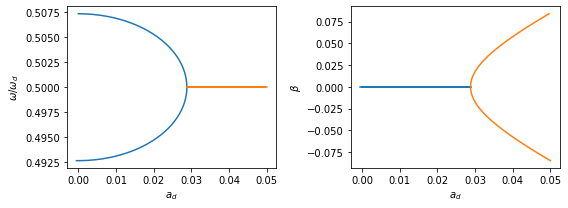

In [7]:
plt.subplots(1,2,figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(pars,np.real(omegas)/(2*np.pi*argsdict['freq']))
plt.plot(pars4,np.real(omegas4)/(2*np.pi*argsdict['freq']))
plt.xlabel('$a_d$')
plt.ylabel(r'$\omega/\omega_d$')
plt.subplot(1,2,2)
plt.ylabel(r'$\beta$')
plt.plot(pars,np.imag(omegas))
plt.plot(pars4,np.imag(omegas4))
plt.xlabel('$a_d$')
plt.tight_layout()
plt.savefig('subharmonic.pdf')
plt.show()

### Inviscid coresonance predicted by degenerate perturbations matrix elements

In [8]:
def mat(omega,argsdict):
    E2,F2=viscid.inviscid_mat_undriven(argsdict)
    return E2-omega**2*F2
def mat2(omega,argsdict):
    E2,F2=viscid.inviscid_mat_undriven(argsdict)
    return -2*omega*F2


omegads1=[]
omegads2=[]
gs1=[]
gs2=[]

for m in range(3):
    for n in range(len(kxss[m])):
        print(m,n,end='\r')
        argsdict['kx']=kxss[m][n]
        argsdict['ky']=kyss[m][n]
        E,F,D=viscid.inviscid_mat(argsdict)
        newomegas=[]
        newvs=[]
        newws=[]

        for i in range(5):
            order=np.argsort(np.real(evalssweeps[m][n]))
            omega1=evalssweeps[m][n][order[i]]**0.5
            v1=revecssweeps[m][n][:,order[i]]
            w1=levecssweeps[m][n][:,order[i]]

            argsdict['verbose']=0
            omegas1,vs1,ws1=viscid.rayleigh_mat(omega1,v1,w1,mat,argsdict,mat2=mat2)
            newomegas=newomegas+[omegas1[-1]]
            newvs=newvs+[vs1[-1]]
            newws=newws+[ws1[-1]]

        newgs1=[]
        newomegads1=[]
        newgs2=[]
        newomegads2=[]
        for i in range(5):
            v1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
            v1[argsdict['Nt']]=newvs[i].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
            v1=v1.ravel()
            w1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
            w1[argsdict['Nt']+1]=newws[i].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
            w1=w1.ravel()
            newgs1=newgs1+[(-D.dot(v1).dot(w1)*D.dot(v1).dot(w1)/(newomegas[i]**2))**0.5]
            newomegads1=newomegads1+[newomegas[i]]

            for j in range(i+1,5): 
                v2=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
                v2[argsdict['Nt']]=newvs[j].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
                v2=v2.ravel()
                w2=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
                w2[argsdict['Nt']+1]=newws[j].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
                w2=w2.ravel()
                newgs2=newgs2+[(-D.dot(v1).dot(w2)*D.dot(v2).dot(w1)/(newomegas[i]*newomegas[j]))**0.5]
                newomegads2=newomegads2+[(newomegas[i]+newomegas[j])/2]

        omegads1=omegads1+[newomegads1]
        gs1=gs1+[newgs1]
        omegads2=omegads2+[newomegads2]
        gs2=gs2+[newgs2]

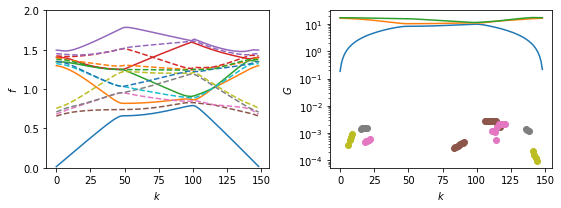

In [9]:
plt.subplots(1,2,figsize=(8,3))

plt.subplot(1,2,1)
plt.plot(np.real(omegads1)/(2*np.pi))
plt.plot(np.real(omegads2)/(2*np.pi),ls='--')
plt.ylim(0,2)
plt.xlabel('$k$')
plt.ylabel('$f$')

plt.subplot(1,2,2)
plt.plot(np.abs(gs1)[:,:3])
for i in range(5):
    fmin=np.max(np.real(np.array(omegads1)[:,0]))
    fmax=np.min(np.real(np.array(omegads1)[:,1]))
    inds=np.intersect1d(np.where(np.array(omegads2)[:,i]>fmin)[0],np.where(np.array(omegads2)[:,i]<fmax)[0])
    plt.scatter(inds,np.abs(gs2)[inds,i],color=colors[5+i])
plt.yscale('log')

plt.xlabel('$k$')
plt.ylabel('$G$')

plt.tight_layout()
plt.savefig('degenerate.pdf')

plt.show()

### Pseudoarclength continuation confirms weak wave mixing and coresonance

In [10]:
imp.reload(viscid)

def mat(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (E.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F.reshape(shape))+argsdict['ad']*D.reshape(shape)).reshape((n_flat,n_flat))
def mat2(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (-2*(omega+ls*argsdict['freq']*2*np.pi)*(F.reshape(shape))).reshape((n_flat,n_flat))
def mat3(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    return D


kind=115
print(omegads2[kind][0]/(2*np.pi)*2)
argsdict['kx']=np.concatenate(kxss)[kind]
argsdict['ky']=np.concatenate(kyss)[kind]
argsdict['ad']=0
argsdict['freq']=1.599
# argsdict['freq']=1.6
argsdict['verbose']=1
argsdict['epss']=0

order=np.argsort(np.concatenate(evalssweeps)[kind])

omega1=np.concatenate(evalssweeps)[kind][order[0]]**0.5+1j*1E-8
v1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
v1[argsdict['Nt']]=np.concatenate(revecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
v1=v1.ravel()
w1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
w1[argsdict['Nt']]=np.concatenate(levecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
w1=w1.ravel()

omegans1,vns1,wns1=viscid.rayleigh_mat(omega1,v1,w1,mat,argsdict)
argsdict['par']='ad'
argsdict['pari']=0
argsdict['parf']=0.05
argsdict['dsmax']=1E-4
argsdict['ds']=1E-4
argsdict['dsmin']=1E-10
argsdict['itmax']=5
omegas,vs,ws,pars,dirs=viscid.pseudocont2(omegans1[-1],vns1[-1],wns1[-1],mat,argsdict,mat2=mat2,mat3=mat3)

(1.5995537437557314+0j)
n=0 dv=2.957970e-03 dw=2.957970e-03 dl=1.415736e-04
n=1 dv=5.677360e-17 dw=5.646084e-17 dl=1.415663e-04
n=2 dv=5.753361e-17 dw=1.114710e-16 dl=1.274669e-08
newdir=(0.000,-0.000,1.000)
step=0 ds=1.000000e-04 ad=0.000000 lambda=3.675649+i0.000000 dir=(0.000, -0.000, 1.000)
n=0 dv=1.857e-09 dlambda=2.259e-09 dmu=4.485e-17 ad=0.000100 lr=3.675649 li=0.000000 mstp=5.577e-09
m=0 direrr=2.271e-16 res=9.908e-15
deltadir=1.047e-06 stp=(0.000,0.000,1.000) newdir=(0.000, -0.000, 1.000)
ds=1.000e-04 ad=0.000100 lambda=3.675649+0.000000i stp=(0.000,0.000,1.000) mstp=5.577e-09
step=1 ds=1.000000e-04 ad=0.000100 lambda=3.675649+i0.000000 dir=(0.000, -0.000, 1.000)
n=0 dv=1.898e-09 dlambda=2.259e-09 dmu=2.231e-12 ad=0.000200 lr=3.675649 li=-0.000000 mstp=5.577e-09
m=0 direrr=1.111e-17 res=1.137e-14
deltadir=3.102e-06 stp=(0.000,-0.000,1.000) newdir=(0.000, -0.000, 1.000)
ds=1.000e-04 ad=0.000200 lambda=3.675649+-0.000000i stp=(0.000,-0.000,1.000) mstp=5.577e-09
step=2 ds=1.0000

m=0 direrr=4.468e-17 res=1.134e-14
deltadir=5.208e-05 stp=(0.005,0.000,1.000) newdir=(0.005, 0.000, 1.000)
ds=1.000e-04 ad=0.002500 lambda=3.675655+0.000000i stp=(0.005,0.000,1.000) mstp=5.577e-09
step=25 ds=1.000000e-04 ad=0.002500 lambda=3.675655+i0.000000 dir=(0.005, 0.000, 1.000)
n=0 dv=7.976e-09 dlambda=2.259e-09 dmu=5.563e-11 ad=0.002600 lr=3.675656 li=-0.000000 mstp=5.577e-09
m=0 direrr=1.144e-16 res=7.601e-15
deltadir=5.436e-05 stp=(0.005,-0.000,1.000) newdir=(0.005, -0.000, 1.000)
ds=1.000e-04 ad=0.002600 lambda=3.675656+-0.000000i stp=(0.005,-0.000,1.000) mstp=5.577e-09
step=26 ds=1.000000e-04 ad=0.002600 lambda=3.675656+i-0.000000 dir=(0.005, -0.000, 1.000)
n=0 dv=8.286e-09 dlambda=2.259e-09 dmu=5.785e-11 ad=0.002700 lr=3.675656 li=0.000000 mstp=5.577e-09
m=0 direrr=5.618e-17 res=2.313e-14
deltadir=5.665e-05 stp=(0.006,0.000,1.000) newdir=(0.006, -0.000, 1.000)
ds=1.000e-04 ad=0.002700 lambda=3.675656+0.000000i stp=(0.006,0.000,1.000) mstp=5.577e-09
step=27 ds=1.000000e-04 a

m=0 direrr=9.756e-17 res=7.919e-15
deltadir=1.078e-04 stp=(0.010,0.000,1.000) newdir=(0.010, -0.000, 1.000)
ds=1.000e-04 ad=0.004700 lambda=3.675672+0.000000i stp=(0.010,0.000,1.000) mstp=5.576e-09
step=47 ds=1.000000e-04 ad=0.004700 lambda=3.675672+i0.000000 dir=(0.010, -0.000, 1.000)
n=0 dv=1.532e-08 dlambda=2.258e-09 dmu=1.043e-10 ad=0.004800 lr=3.675673 li=-0.000000 mstp=5.576e-09
m=0 direrr=2.800e-17 res=1.162e-14
deltadir=1.106e-04 stp=(0.010,-0.000,1.000) newdir=(0.010, 0.000, 1.000)
ds=1.000e-04 ad=0.004800 lambda=3.675673+-0.000000i stp=(0.010,-0.000,1.000) mstp=5.576e-09
step=48 ds=1.000000e-04 ad=0.004800 lambda=3.675673+i-0.000000 dir=(0.010, 0.000, 1.000)
n=0 dv=1.569e-08 dlambda=2.258e-09 dmu=1.066e-10 ad=0.004900 lr=3.675674 li=-0.000000 mstp=5.576e-09
m=0 direrr=4.726e-17 res=2.702e-14
deltadir=1.136e-04 stp=(0.010,0.000,1.000) newdir=(0.010, -0.000, 1.000)
ds=1.000e-04 ad=0.004900 lambda=3.675674+-0.000000i stp=(0.010,0.000,1.000) mstp=5.576e-09
step=49 ds=1.000000e-04

n=0 dv=2.373e-08 dlambda=2.258e-09 dmu=1.506e-10 ad=0.006900 lr=3.675699 li=-0.000000 mstp=5.575e-09
m=0 direrr=1.370e-16 res=1.254e-14
deltadir=1.827e-04 stp=(0.014,-0.000,1.000) newdir=(0.015, -0.000, 1.000)
ds=1.000e-04 ad=0.006900 lambda=3.675699+-0.000000i stp=(0.014,-0.000,1.000) mstp=5.575e-09
step=69 ds=1.000000e-04 ad=0.006900 lambda=3.675699+i-0.000000 dir=(0.015, -0.000, 1.000)
n=0 dv=2.417e-08 dlambda=2.258e-09 dmu=1.528e-10 ad=0.007000 lr=3.675700 li=-0.000000 mstp=5.575e-09
m=0 direrr=9.987e-17 res=1.640e-14
deltadir=1.868e-04 stp=(0.015,-0.000,1.000) newdir=(0.015, 0.000, 1.000)
ds=1.000e-04 ad=0.007000 lambda=3.675700+-0.000000i stp=(0.015,-0.000,1.000) mstp=5.575e-09
step=70 ds=1.000000e-04 ad=0.007000 lambda=3.675700+i-0.000000 dir=(0.015, 0.000, 1.000)
n=0 dv=2.463e-08 dlambda=2.258e-09 dmu=1.550e-10 ad=0.007100 lr=3.675702 li=0.000000 mstp=5.575e-09
m=0 direrr=8.096e-17 res=1.970e-14
deltadir=1.910e-04 stp=(0.015,0.000,1.000) newdir=(0.015, 0.000, 1.000)
ds=1.000e-0

n=0 dv=3.553e-08 dlambda=2.257e-09 dmu=2.011e-10 ad=0.009199 lr=3.675738 li=-0.000000 mstp=5.572e-09
m=0 direrr=1.257e-16 res=3.187e-14
deltadir=3.000e-04 stp=(0.019,-0.000,1.000) newdir=(0.019, 0.000, 1.000)
ds=1.000e-04 ad=0.009199 lambda=3.675738+-0.000000i stp=(0.019,-0.000,1.000) mstp=5.572e-09
step=92 ds=1.000000e-04 ad=0.009199 lambda=3.675738+i-0.000000 dir=(0.019, 0.000, 1.000)
n=0 dv=3.613e-08 dlambda=2.257e-09 dmu=2.032e-10 ad=0.009299 lr=3.675740 li=0.000000 mstp=5.572e-09
m=0 direrr=6.711e-17 res=1.409e-14
deltadir=3.065e-04 stp=(0.020,0.000,1.000) newdir=(0.020, 0.000, 1.000)
ds=1.000e-04 ad=0.009299 lambda=3.675740+0.000000i stp=(0.020,0.000,1.000) mstp=5.572e-09
step=93 ds=1.000000e-04 ad=0.009299 lambda=3.675740+i0.000000 dir=(0.020, 0.000, 1.000)
n=0 dv=3.674e-08 dlambda=2.257e-09 dmu=2.054e-10 ad=0.009399 lr=3.675742 li=0.000000 mstp=5.572e-09
m=0 direrr=1.346e-17 res=1.791e-14
deltadir=3.131e-04 stp=(0.020,0.000,1.000) newdir=(0.020, 0.000, 1.000)
ds=1.000e-04 ad=0.

n=0 dv=5.358e-08 dlambda=2.256e-09 dmu=2.555e-10 ad=0.011699 lr=3.675793 li=-0.000000 mstp=5.569e-09
m=0 direrr=3.914e-17 res=1.487e-14
deltadir=5.139e-04 stp=(0.025,-0.000,1.000) newdir=(0.025, -0.000, 1.000)
ds=1.000e-04 ad=0.011699 lambda=3.675793+-0.000000i stp=(0.025,-0.000,1.000) mstp=5.569e-09
step=117 ds=1.000000e-04 ad=0.011699 lambda=3.675793+i-0.000000 dir=(0.025, -0.000, 1.000)
n=0 dv=5.446e-08 dlambda=2.256e-09 dmu=2.577e-10 ad=0.011799 lr=3.675796 li=0.000000 mstp=5.569e-09
m=0 direrr=6.473e-17 res=2.601e-14
deltadir=5.253e-04 stp=(0.025,0.000,1.000) newdir=(0.025, -0.000, 1.000)
ds=1.000e-04 ad=0.011799 lambda=3.675796+0.000000i stp=(0.025,0.000,1.000) mstp=5.569e-09
step=118 ds=1.000000e-04 ad=0.011799 lambda=3.675796+i0.000000 dir=(0.025, -0.000, 1.000)
n=0 dv=5.536e-08 dlambda=2.256e-09 dmu=2.599e-10 ad=0.011899 lr=3.675798 li=-0.000000 mstp=5.569e-09
m=0 direrr=1.274e-16 res=9.200e-15
deltadir=5.370e-04 stp=(0.025,-0.000,1.000) newdir=(0.025, -0.000, 1.000)
ds=1.000e

m=0 direrr=7.418e-17 res=2.383e-14
deltadir=8.459e-04 stp=(0.029,-0.000,1.000) newdir=(0.029, 0.000, 1.000)
ds=1.000e-04 ad=0.013898 lambda=3.675853+-0.000000i stp=(0.029,-0.000,1.000) mstp=5.566e-09
step=139 ds=1.000000e-04 ad=0.013898 lambda=3.675853+i-0.000000 dir=(0.029, 0.000, 1.000)
n=0 dv=7.850e-08 dlambda=2.255e-09 dmu=3.054e-10 ad=0.013998 lr=3.675855 li=0.000000 mstp=5.566e-09
m=0 direrr=1.689e-17 res=1.992e-14
deltadir=8.660e-04 stp=(0.029,0.000,1.000) newdir=(0.030, 0.000, 1.000)
ds=1.000e-04 ad=0.013998 lambda=3.675855+0.000000i stp=(0.029,0.000,1.000) mstp=5.566e-09
step=140 ds=1.000000e-04 ad=0.013998 lambda=3.675855+i0.000000 dir=(0.030, 0.000, 1.000)
n=0 dv=7.985e-08 dlambda=2.255e-09 dmu=3.075e-10 ad=0.014098 lr=3.675858 li=0.000000 mstp=5.566e-09
m=0 direrr=9.402e-17 res=2.029e-14
deltadir=8.866e-04 stp=(0.030,-0.000,1.000) newdir=(0.030, 0.000, 1.000)
ds=1.000e-04 ad=0.014098 lambda=3.675858+0.000000i stp=(0.030,-0.000,1.000) mstp=5.566e-09
step=141 ds=1.000000e-04 

m=0 direrr=3.877e-17 res=1.460e-14
deltadir=2.211e-03 stp=(0.034,0.000,0.999) newdir=(0.034, -0.000, 0.999)
ds=1.000e-04 ad=0.016197 lambda=3.675926+0.000000i stp=(0.034,0.000,0.999) mstp=2.225e-08
step=162 ds=1.000000e-04 ad=0.016197 lambda=3.675926+i0.000000 dir=(0.034, 0.000, 0.999)
n=0 dv=2.343e-07 dlambda=4.508e-09 dmu=7.077e-10 ad=0.016297 lr=3.675929 li=-0.000000 mstp=2.225e-08
m=0 direrr=9.342e-17 res=2.362e-14
deltadir=2.268e-03 stp=(0.034,-0.000,0.999) newdir=(0.034, 0.000, 0.999)
ds=1.000e-04 ad=0.016297 lambda=3.675929+-0.000000i stp=(0.034,-0.000,0.999) mstp=2.225e-08
step=163 ds=1.000000e-04 ad=0.016297 lambda=3.675929+i-0.000000 dir=(0.034, -0.000, 0.999)
n=0 dv=2.386e-07 dlambda=4.508e-09 dmu=7.120e-10 ad=0.016397 lr=3.675932 li=0.000000 mstp=2.225e-08
m=0 direrr=2.045e-17 res=1.908e-14
deltadir=2.326e-03 stp=(0.035,0.000,0.999) newdir=(0.035, 0.000, 0.999)
ds=1.000e-04 ad=0.016397 lambda=3.675932+0.000000i stp=(0.035,0.000,0.999) mstp=2.225e-08
step=164 ds=1.000000e-04

m=0 direrr=3.991e-17 res=1.424e-14
deltadir=4.161e-03 stp=(0.039,-0.000,0.999) newdir=(0.039, 0.000, 0.999)
ds=1.000e-04 ad=0.018595 lambda=3.676014+-0.000000i stp=(0.039,-0.000,0.999) mstp=2.224e-08
step=186 ds=1.000000e-04 ad=0.018595 lambda=3.676014+i-0.000000 dir=(0.039, -0.000, 0.999)
n=0 dv=3.746e-07 dlambda=4.504e-09 dmu=8.104e-10 ad=0.018695 lr=3.676018 li=-0.000000 mstp=2.224e-08
m=0 direrr=5.981e-17 res=2.209e-14
deltadir=4.276e-03 stp=(0.039,0.000,0.999) newdir=(0.039, -0.000, 0.999)
ds=1.000e-04 ad=0.018695 lambda=3.676018+-0.000000i stp=(0.039,0.000,0.999) mstp=2.224e-08
step=187 ds=1.000000e-04 ad=0.018695 lambda=3.676018+i-0.000000 dir=(0.039, 0.000, 0.999)
n=0 dv=3.825e-07 dlambda=4.504e-09 dmu=8.147e-10 ad=0.018795 lr=3.676022 li=0.000000 mstp=2.224e-08
m=0 direrr=7.803e-17 res=1.929e-14
deltadir=4.395e-03 stp=(0.040,0.000,0.999) newdir=(0.040, -0.000, 0.999)
ds=1.000e-04 ad=0.018795 lambda=3.676022+0.000000i stp=(0.040,0.000,0.999) mstp=2.224e-08
step=188 ds=1.000000e

m=0 direrr=1.110e-16 res=1.968e-14
deltadir=8.146e-03 stp=(0.044,0.000,0.999) newdir=(0.044, 0.000, 0.999)
ds=1.000e-04 ad=0.020993 lambda=3.676114+0.000000i stp=(0.044,0.000,0.999) mstp=2.226e-08
step=210 ds=1.000000e-04 ad=0.020993 lambda=3.676114+i0.000000 dir=(0.044, 0.000, 0.999)
n=0 dv=6.436e-07 dlambda=4.499e-09 dmu=9.127e-10 ad=0.021093 lr=3.676118 li=0.000000 mstp=2.226e-08
m=0 direrr=5.083e-17 res=2.286e-14
deltadir=8.381e-03 stp=(0.044,0.000,0.999) newdir=(0.045, -0.000, 0.999)
ds=1.000e-04 ad=0.021093 lambda=3.676118+0.000000i stp=(0.044,0.000,0.999) mstp=2.226e-08
step=211 ds=1.000000e-04 ad=0.021093 lambda=3.676118+i0.000000 dir=(0.044, 0.000, 0.999)
n=0 dv=6.596e-07 dlambda=4.499e-09 dmu=9.169e-10 ad=0.021193 lr=3.676123 li=-0.000000 mstp=2.226e-08
m=0 direrr=9.895e-17 res=2.290e-14
deltadir=8.622e-03 stp=(0.045,-0.000,0.999) newdir=(0.045, -0.000, 0.999)
ds=1.000e-04 ad=0.021193 lambda=3.676123+-0.000000i stp=(0.045,-0.000,0.999) mstp=2.226e-08
step=212 ds=1.000000e-04 

m=0 direrr=9.390e-17 res=2.757e-14
deltadir=1.599e-02 stp=(0.049,0.000,0.999) newdir=(0.049, -0.000, 0.999)
ds=1.000e-04 ad=0.023390 lambda=3.676226+0.000000i stp=(0.049,0.000,0.999) mstp=2.240e-08
step=234 ds=1.000000e-04 ad=0.023390 lambda=3.676226+i0.000000 dir=(0.049, 0.000, 0.999)
n=0 dv=1.233e-06 dlambda=4.492e-09 dmu=1.015e-09 ad=0.023490 lr=3.676231 li=0.000000 mstp=2.242e-08
m=0 direrr=1.176e-16 res=2.457e-14
deltadir=1.643e-02 stp=(0.049,-0.000,0.999) newdir=(0.050, 0.000, 0.999)
ds=1.000e-04 ad=0.023490 lambda=3.676231+0.000000i stp=(0.049,-0.000,0.999) mstp=2.242e-08
step=235 ds=1.000000e-04 ad=0.023490 lambda=3.676231+i0.000000 dir=(0.049, -0.000, 0.999)
n=0 dv=1.271e-06 dlambda=4.491e-09 dmu=1.019e-09 ad=0.023590 lr=3.676236 li=-0.000000 mstp=2.243e-08
m=0 direrr=7.884e-17 res=2.957e-14
deltadir=1.688e-02 stp=(0.050,-0.000,0.999) newdir=(0.050, -0.000, 0.999)
ds=1.000e-04 ad=0.023590 lambda=3.676236+-0.000000i stp=(0.050,-0.000,0.999) mstp=2.243e-08
step=236 ds=1.000000e-

m=0 direrr=1.135e-16 res=3.475e-14
deltadir=3.112e-02 stp=(0.055,0.000,0.999) newdir=(0.055, -0.000, 0.998)
ds=1.000e-04 ad=0.025987 lambda=3.676362+0.000000i stp=(0.055,0.000,0.999) mstp=2.369e-08
step=260 ds=1.000000e-04 ad=0.025987 lambda=3.676362+i0.000000 dir=(0.055, 0.000, 0.999)
n=0 dv=3.047e-06 dlambda=4.476e-09 dmu=1.131e-09 ad=0.026087 lr=3.676367 li=0.000000 mstp=2.383e-08
m=0 direrr=2.413e-17 res=3.347e-14
deltadir=3.187e-02 stp=(0.055,0.000,0.998) newdir=(0.055, -0.000, 0.998)
ds=1.000e-04 ad=0.026087 lambda=3.676367+0.000000i stp=(0.055,0.000,0.998) mstp=2.383e-08
step=261 ds=1.000000e-04 ad=0.026087 lambda=3.676367+i0.000000 dir=(0.055, 0.000, 0.998)
n=0 dv=3.174e-06 dlambda=4.475e-09 dmu=1.136e-09 ad=0.026187 lr=3.676373 li=0.000000 mstp=2.398e-08
m=0 direrr=6.122e-17 res=3.817e-14
deltadir=3.263e-02 stp=(0.055,-0.000,0.998) newdir=(0.055, -0.000, 0.998)
ds=1.000e-04 ad=0.026187 lambda=3.676373+0.000000i stp=(0.055,-0.000,0.998) mstp=2.398e-08
step=262 ds=1.000000e-04 a

n=0 dv=8.275e-06 dlambda=4.438e-09 dmu=1.265e-09 ad=0.028183 lr=3.676487 li=0.000000 mstp=3.532e-08
m=0 direrr=7.440e-17 res=8.414e-14
deltadir=5.150e-02 stp=(0.059,-0.000,0.998) newdir=(0.059, -0.000, 0.998)
ds=1.000e-04 ad=0.028183 lambda=3.676487+0.000000i stp=(0.059,-0.000,0.998) mstp=3.532e-08
step=282 ds=1.000000e-04 ad=0.028183 lambda=3.676487+i0.000000 dir=(0.059, -0.000, 0.998)
n=0 dv=8.760e-06 dlambda=4.435e-09 dmu=1.275e-09 ad=0.028283 lr=3.676493 li=-0.000000 mstp=3.694e-08
m=0 direrr=2.702e-17 res=7.364e-14
deltadir=5.270e-02 stp=(0.059,-0.000,0.998) newdir=(0.060, 0.000, 0.998)
ds=1.000e-04 ad=0.028283 lambda=3.676493+-0.000000i stp=(0.059,-0.000,0.998) mstp=3.694e-08
step=283 ds=1.000000e-04 ad=0.028283 lambda=3.676493+i-0.000000 dir=(0.059, -0.000, 0.998)
n=0 dv=9.284e-06 dlambda=4.431e-09 dmu=1.286e-09 ad=0.028383 lr=3.676499 li=0.000000 mstp=3.879e-08
m=0 direrr=4.764e-17 res=9.438e-14
deltadir=5.393e-02 stp=(0.060,0.000,0.998) newdir=(0.060, -0.000, 0.998)
ds=1.000e-

n=0 dv=5.007e-05 dlambda=4.147e-09 dmu=2.585e-09 ad=0.030579 lr=3.676636 li=-0.000000 mstp=5.205e-07
m=0 direrr=6.736e-17 res=3.467e-13
deltadir=9.744e-02 stp=(0.064,-0.000,0.998) newdir=(0.064, 0.000, 0.998)
ds=1.000e-04 ad=0.030579 lambda=3.676636+-0.000000i stp=(0.064,-0.000,0.998) mstp=5.205e-07
step=306 ds=1.000000e-04 ad=0.030579 lambda=3.676636+i-0.000000 dir=(0.064, -0.000, 0.998)
n=0 dv=5.559e-05 dlambda=4.107e-09 dmu=2.837e-09 ad=0.030678 lr=3.676642 li=0.000000 mstp=6.369e-07
m=0 direrr=1.046e-16 res=2.812e-13
deltadir=1.008e-01 stp=(0.064,0.000,0.998) newdir=(0.064, -0.000, 0.998)
ds=1.000e-04 ad=0.030678 lambda=3.676642+0.000000i stp=(0.064,0.000,0.998) mstp=6.369e-07
step=307 ds=1.000000e-04 ad=0.030678 lambda=3.676642+i0.000000 dir=(0.064, 0.000, 0.998)
n=0 dv=6.195e-05 dlambda=4.062e-09 dmu=3.148e-09 ad=0.030778 lr=3.676649 li=0.000000 mstp=7.861e-07
m=0 direrr=9.007e-17 res=2.020e-13
deltadir=1.044e-01 stp=(0.065,-0.000,0.998) newdir=(0.065, 0.000, 0.998)
ds=1.000e-04 

n=0 dv=3.068e-03 dlambda=3.537e-08 dmu=1.237e-06 ad=0.032764 lr=3.676780 li=-0.000000 mstp=1.960e-03
n=1 dv=7.844e-07 dlambda=6.742e-11 dmu=4.749e-09 ad=0.032764 lr=3.676780 li=-0.000000 mstp=1.960e-03
m=0 direrr=1.403e-14 res=4.706e-12
deltadir=3.250e-01 stp=(0.063,-0.000,0.964) newdir=(0.061, -0.000, 0.951)
ds=1.000e-04 ad=0.032764 lambda=3.676780+-0.000000i stp=(0.063,-0.000,0.964) mstp=1.960e-03
step=328 ds=1.000000e-04 ad=0.032764 lambda=3.676780+i-0.000000 dir=(0.062, -0.000, 0.962)
n=0 dv=4.430e-03 dlambda=6.251e-08 dmu=2.353e-06 ad=0.032858 lr=3.676786 li=-0.000000 mstp=4.200e-03
n=1 dv=3.630e-06 dlambda=2.172e-10 dmu=1.576e-08 ad=0.032858 lr=3.676786 li=0.000000 mstp=4.201e-03
m=0 direrr=3.867e-15 res=5.968e-12
deltadir=3.468e-01 stp=(0.059,0.000,0.938) newdir=(0.057, 0.000, 0.912)
ds=1.000e-04 ad=0.032858 lambda=3.676786+0.000000i stp=(0.059,0.000,0.938) mstp=4.201e-03
step=329 ds=1.000000e-04 ad=0.032858 lambda=3.676786+i0.000000 dir=(0.059, 0.000, 0.934)
n=0 dv=6.314e-03 dl

n=0 dv=2.693e-03 dlambda=2.012e-08 dmu=1.107e-06 ad=0.032660 lr=3.676626 li=0.000000 mstp=1.512e-03
n=1 dv=1.462e-07 dlambda=1.258e-10 dmu=2.060e-09 ad=0.032660 lr=3.676626 li=-0.000000 mstp=1.512e-03
m=0 direrr=1.032e-15 res=9.755e-13
deltadir=5.631e-01 stp=(-0.265,0.000,-0.954) newdir=(-0.264, 0.000, -0.955)
ds=1.000e-04 ad=0.032660 lambda=3.676626+-0.000000i stp=(-0.265,0.000,-0.954) mstp=1.512e-03
step=346 ds=1.000000e-04 ad=0.032660 lambda=3.676626+i-0.000000 dir=(-0.264, 0.000, -0.952)
n=0 dv=1.770e-03 dlambda=3.400e-09 dmu=5.479e-07 ad=0.032565 lr=3.676600 li=-0.000000 mstp=6.423e-04
n=1 dv=4.531e-08 dlambda=4.996e-11 dmu=8.226e-10 ad=0.032565 lr=3.676600 li=0.000000 mstp=6.423e-04
m=0 direrr=9.489e-16 res=7.230e-13
deltadir=4.790e-01 stp=(-0.264,0.000,-0.958) newdir=(-0.264, -0.000, -0.959)
ds=1.000e-04 ad=0.032565 lambda=3.676600+0.000000i stp=(-0.264,0.000,-0.958) mstp=6.423e-04
step=347 ds=1.000000e-04 ad=0.032565 lambda=3.676600+i0.000000 dir=(-0.264, 0.000, -0.957)
n=0 dv=

n=0 dv=3.195e-05 dlambda=1.610e-08 dmu=1.936e-08 ad=0.030536 lr=3.676063 li=0.000000 mstp=5.076e-07
m=0 direrr=1.830e-17 res=8.270e-14
deltadir=1.054e-01 stp=(-0.248,0.000,-0.969) newdir=(-0.248, 0.000, -0.969)
ds=1.000e-04 ad=0.030536 lambda=3.676063+0.000000i stp=(-0.248,0.000,-0.969) mstp=5.076e-07
step=368 ds=1.000000e-04 ad=0.030536 lambda=3.676063+i0.000000 dir=(-0.248, 0.000, -0.969)
n=0 dv=2.881e-05 dlambda=1.609e-08 dmu=1.919e-08 ad=0.030439 lr=3.676038 li=0.000000 mstp=4.685e-07
m=0 direrr=8.529e-17 res=1.074e-13
deltadir=1.011e-01 stp=(-0.247,-0.000,-0.969) newdir=(-0.247, 0.000, -0.969)
ds=1.000e-04 ad=0.030439 lambda=3.676038+0.000000i stp=(-0.247,-0.000,-0.969) mstp=4.685e-07
step=369 ds=1.000000e-04 ad=0.030439 lambda=3.676038+i0.000000 dir=(-0.247, -0.000, -0.969)
n=0 dv=2.607e-05 dlambda=1.608e-08 dmu=1.904e-08 ad=0.030342 lr=3.676013 li=-0.000000 mstp=4.377e-07
m=0 direrr=1.715e-16 res=8.382e-14
deltadir=9.695e-02 stp=(-0.246,-0.000,-0.969) newdir=(-0.246, -0.000, -0.

n=0 dv=6.104e-06 dlambda=1.611e-08 dmu=1.757e-08 ad=0.028497 lr=3.675560 li=-0.000000 mstp=3.075e-07
m=0 direrr=6.718e-17 res=8.188e-14
deltadir=4.516e-02 stp=(-0.232,-0.000,-0.973) newdir=(-0.232, -0.000, -0.973)
ds=1.000e-04 ad=0.028497 lambda=3.675560+-0.000000i stp=(-0.232,-0.000,-0.973) mstp=3.075e-07
step=389 ds=1.000000e-04 ad=0.028497 lambda=3.675560+i-0.000000 dir=(-0.232, -0.000, -0.973)
n=0 dv=5.748e-06 dlambda=1.612e-08 dmu=1.752e-08 ad=0.028400 lr=3.675537 li=-0.000000 mstp=3.068e-07
m=0 direrr=8.827e-17 res=7.111e-14
deltadir=4.328e-02 stp=(-0.231,0.000,-0.973) newdir=(-0.231, 0.000, -0.973)
ds=1.000e-04 ad=0.028400 lambda=3.675537+-0.000000i stp=(-0.231,0.000,-0.973) mstp=3.068e-07
step=390 ds=1.000000e-04 ad=0.028400 lambda=3.675537+i-0.000000 dir=(-0.231, 0.000, -0.973)
n=0 dv=5.420e-06 dlambda=1.613e-08 dmu=1.747e-08 ad=0.028303 lr=3.675513 li=0.000000 mstp=3.062e-07
m=0 direrr=8.651e-17 res=1.016e-13
deltadir=4.147e-02 stp=(-0.231,0.000,-0.973) newdir=(-0.230, -0.000

step=409 ds=1.000000e-04 ad=0.026548 lambda=3.675111+i0.000000 dir=(-0.217, -0.000, -0.976)
n=0 dv=2.113e-06 dlambda=1.630e-08 dmu=1.651e-08 ad=0.026450 lr=3.675090 li=-0.000000 mstp=3.057e-07
m=0 direrr=1.920e-16 res=7.295e-14
deltadir=1.728e-02 stp=(-0.216,-0.000,-0.976) newdir=(-0.216, 0.000, -0.976)
ds=1.000e-04 ad=0.026450 lambda=3.675090+-0.000000i stp=(-0.216,-0.000,-0.976) mstp=3.057e-07
step=410 ds=1.000000e-04 ad=0.026450 lambda=3.675090+i-0.000000 dir=(-0.216, -0.000, -0.976)
n=0 dv=2.025e-06 dlambda=1.631e-08 dmu=1.646e-08 ad=0.026353 lr=3.675068 li=0.000000 mstp=3.059e-07
m=0 direrr=1.389e-16 res=6.619e-14
deltadir=1.647e-02 stp=(-0.215,0.000,-0.977) newdir=(-0.215, 0.000, -0.977)
ds=1.000e-04 ad=0.026353 lambda=3.675068+0.000000i stp=(-0.215,0.000,-0.977) mstp=3.059e-07
step=411 ds=1.000000e-04 ad=0.026353 lambda=3.675068+i0.000000 dir=(-0.215, 0.000, -0.977)
n=0 dv=1.943e-06 dlambda=1.632e-08 dmu=1.641e-08 ad=0.026255 lr=3.675047 li=0.000000 mstp=3.061e-07
m=0 direrr=1.2

n=0 dv=9.341e-07 dlambda=1.652e-08 dmu=1.540e-08 ad=0.024298 lr=3.674633 li=0.000000 mstp=3.109e-07
m=0 direrr=6.539e-18 res=9.966e-14
deltadir=6.042e-03 stp=(-0.199,-0.000,-0.980) newdir=(-0.199, 0.000, -0.980)
ds=1.000e-04 ad=0.024298 lambda=3.674633+0.000000i stp=(-0.199,-0.000,-0.980) mstp=3.109e-07
step=432 ds=1.000000e-04 ad=0.024298 lambda=3.674633+i0.000000 dir=(-0.199, -0.000, -0.980)
n=0 dv=9.044e-07 dlambda=1.653e-08 dmu=1.535e-08 ad=0.024200 lr=3.674614 li=0.000000 mstp=3.111e-07
m=0 direrr=9.581e-17 res=5.698e-14
deltadir=5.768e-03 stp=(-0.199,0.000,-0.980) newdir=(-0.198, -0.000, -0.980)
ds=1.000e-04 ad=0.024200 lambda=3.674614+0.000000i stp=(-0.199,0.000,-0.980) mstp=3.111e-07
step=433 ds=1.000000e-04 ad=0.024200 lambda=3.674614+i0.000000 dir=(-0.199, 0.000, -0.980)
n=0 dv=8.759e-07 dlambda=1.654e-08 dmu=1.530e-08 ad=0.024102 lr=3.674594 li=-0.000000 mstp=3.114e-07
m=0 direrr=9.744e-17 res=7.499e-14
deltadir=5.508e-03 stp=(-0.198,-0.000,-0.980) newdir=(-0.197, -0.000, -0

step=452 ds=1.000000e-04 ad=0.022335 lambda=3.674251+i-0.000000 dir=(-0.184, -0.000, -0.983)
n=0 dv=5.040e-07 dlambda=1.672e-08 dmu=1.430e-08 ad=0.022237 lr=3.674233 li=0.000000 mstp=3.163e-07
m=0 direrr=3.698e-17 res=7.263e-14
deltadir=2.375e-03 stp=(-0.183,0.000,-0.983) newdir=(-0.183, 0.000, -0.983)
ds=1.000e-04 ad=0.022237 lambda=3.674233+0.000000i stp=(-0.183,0.000,-0.983) mstp=3.163e-07
step=453 ds=1.000000e-04 ad=0.022237 lambda=3.674233+i0.000000 dir=(-0.183, 0.000, -0.983)
n=0 dv=4.908e-07 dlambda=1.673e-08 dmu=1.424e-08 ad=0.022139 lr=3.674215 li=0.000000 mstp=3.165e-07
m=0 direrr=5.370e-17 res=6.446e-14
deltadir=2.276e-03 stp=(-0.182,-0.000,-0.983) newdir=(-0.182, 0.000, -0.983)
ds=1.000e-04 ad=0.022139 lambda=3.674215+0.000000i stp=(-0.182,-0.000,-0.983) mstp=3.165e-07
step=454 ds=1.000000e-04 ad=0.022139 lambda=3.674215+i0.000000 dir=(-0.182, -0.000, -0.983)
n=0 dv=4.780e-07 dlambda=1.674e-08 dmu=1.419e-08 ad=0.022040 lr=3.674196 li=0.000000 mstp=3.168e-07
m=0 direrr=2.870

m=0 direrr=1.090e-16 res=6.167e-14
deltadir=1.010e-03 stp=(-0.166,0.000,-0.986) newdir=(-0.166, -0.000, -0.986)
ds=1.000e-04 ad=0.020169 lambda=3.673867+0.000000i stp=(-0.166,0.000,-0.986) mstp=3.215e-07
step=474 ds=1.000000e-04 ad=0.020169 lambda=3.673867+i0.000000 dir=(-0.166, 0.000, -0.986)
n=0 dv=2.943e-07 dlambda=1.692e-08 dmu=1.309e-08 ad=0.020070 lr=3.673850 li=0.000000 mstp=3.217e-07
m=0 direrr=9.735e-17 res=1.095e-13
deltadir=9.712e-04 stp=(-0.166,0.000,-0.986) newdir=(-0.165, 0.000, -0.986)
ds=1.000e-04 ad=0.020070 lambda=3.673850+0.000000i stp=(-0.166,0.000,-0.986) mstp=3.217e-07
step=475 ds=1.000000e-04 ad=0.020070 lambda=3.673850+i0.000000 dir=(-0.165, 0.000, -0.986)
n=0 dv=1.428e-07 dlambda=8.468e-09 dmu=6.502e-09 ad=0.019972 lr=3.673834 li=-0.000000 mstp=8.052e-08
m=0 direrr=7.201e-17 res=6.447e-14
deltadir=6.184e-04 stp=(-0.165,-0.000,-0.986) newdir=(-0.164, 0.000, -0.986)
ds=1.000e-04 ad=0.019972 lambda=3.673834+-0.000000i stp=(-0.165,-0.000,-0.986) mstp=8.052e-08
step

step=495 ds=1.000000e-04 ad=0.018095 lambda=3.673536+i-0.000000 dir=(-0.149, 0.000, -0.989)
n=0 dv=9.398e-08 dlambda=8.551e-09 dmu=5.930e-09 ad=0.017996 lr=3.673521 li=0.000000 mstp=8.167e-08
m=0 direrr=1.378e-16 res=1.032e-13
deltadir=2.875e-04 stp=(-0.149,0.000,-0.989) newdir=(-0.149, -0.000, -0.989)
ds=1.000e-04 ad=0.017996 lambda=3.673521+0.000000i stp=(-0.149,0.000,-0.989) mstp=8.167e-08
step=496 ds=1.000000e-04 ad=0.017996 lambda=3.673521+i0.000000 dir=(-0.149, -0.000, -0.989)
n=0 dv=9.215e-08 dlambda=8.555e-09 dmu=5.901e-09 ad=0.017898 lr=3.673506 li=-0.000000 mstp=8.173e-08
m=0 direrr=5.582e-17 res=7.386e-14
deltadir=2.768e-04 stp=(-0.148,-0.000,-0.989) newdir=(-0.148, -0.000, -0.989)
ds=1.000e-04 ad=0.017898 lambda=3.673506+-0.000000i stp=(-0.148,-0.000,-0.989) mstp=8.173e-08
step=497 ds=1.000000e-04 ad=0.017898 lambda=3.673506+i-0.000000 dir=(-0.148, -0.000, -0.989)
n=0 dv=9.037e-08 dlambda=8.559e-09 dmu=5.872e-09 ad=0.017799 lr=3.673491 li=0.000000 mstp=8.178e-08
m=0 direrr=

n=0 dv=6.351e-08 dlambda=8.630e-09 dmu=5.307e-09 ad=0.015917 lr=3.673226 li=0.000000 mstp=8.279e-08
m=0 direrr=6.455e-17 res=7.672e-14
deltadir=1.282e-04 stp=(-0.132,0.000,-0.991) newdir=(-0.132, 0.000, -0.991)
ds=1.000e-04 ad=0.015917 lambda=3.673226+0.000000i stp=(-0.132,0.000,-0.991) mstp=8.279e-08
step=517 ds=1.000000e-04 ad=0.015917 lambda=3.673226+i0.000000 dir=(-0.132, 0.000, -0.991)
n=0 dv=6.240e-08 dlambda=8.634e-09 dmu=5.277e-09 ad=0.015818 lr=3.673213 li=-0.000000 mstp=8.284e-08
m=0 direrr=4.705e-17 res=5.548e-14
deltadir=1.232e-04 stp=(-0.131,-0.000,-0.991) newdir=(-0.131, 0.000, -0.991)
ds=1.000e-04 ad=0.015818 lambda=3.673213+-0.000000i stp=(-0.131,-0.000,-0.991) mstp=8.284e-08
step=518 ds=1.000000e-04 ad=0.015818 lambda=3.673213+i-0.000000 dir=(-0.131, 0.000, -0.991)
n=0 dv=6.131e-08 dlambda=8.637e-09 dmu=5.247e-09 ad=0.015719 lr=3.673200 li=0.000000 mstp=8.289e-08
m=0 direrr=8.800e-17 res=7.624e-14
deltadir=1.184e-04 stp=(-0.130,0.000,-0.991) newdir=(-0.130, 0.000, -0.9

m=0 direrr=8.614e-17 res=5.208e-14
deltadir=5.266e-05 stp=(-0.115,-0.000,-0.993) newdir=(-0.115, -0.000, -0.993)
ds=1.000e-04 ad=0.013833 lambda=3.672968+-0.000000i stp=(-0.115,-0.000,-0.993) mstp=8.378e-08
step=538 ds=1.000000e-04 ad=0.013833 lambda=3.672968+i-0.000000 dir=(-0.115, -0.000, -0.993)
n=0 dv=4.372e-08 dlambda=8.704e-09 dmu=4.632e-09 ad=0.013734 lr=3.672956 li=0.000000 mstp=8.383e-08
m=0 direrr=1.116e-16 res=1.151e-13
deltadir=5.025e-05 stp=(-0.114,0.000,-0.993) newdir=(-0.114, 0.000, -0.993)
ds=1.000e-04 ad=0.013734 lambda=3.672956+0.000000i stp=(-0.114,0.000,-0.993) mstp=8.383e-08
step=539 ds=1.000000e-04 ad=0.013734 lambda=3.672956+i0.000000 dir=(-0.114, 0.000, -0.993)
n=0 dv=4.302e-08 dlambda=8.708e-09 dmu=4.601e-09 ad=0.013635 lr=3.672945 li=-0.000000 mstp=8.387e-08
m=0 direrr=2.090e-16 res=5.876e-14
deltadir=4.792e-05 stp=(-0.113,-0.000,-0.994) newdir=(-0.113, 0.000, -0.994)
ds=1.000e-04 ad=0.013635 lambda=3.672945+-0.000000i stp=(-0.113,-0.000,-0.994) mstp=8.387e-08

step=559 ds=1.000000e-04 ad=0.011745 lambda=3.672745+i0.000000 dir=(-0.098, -0.000, -0.995)
n=0 dv=3.134e-08 dlambda=8.766e-09 dmu=3.968e-09 ad=0.011646 lr=3.672735 li=-0.000000 mstp=8.470e-08
m=0 direrr=1.075e-16 res=5.715e-14
deltadir=1.493e-05 stp=(-0.097,-0.000,-0.995) newdir=(-0.097, -0.000, -0.995)
ds=1.000e-04 ad=0.011646 lambda=3.672735+-0.000000i stp=(-0.097,-0.000,-0.995) mstp=8.470e-08
step=560 ds=1.000000e-04 ad=0.011646 lambda=3.672735+i-0.000000 dir=(-0.097, -0.000, -0.995)
n=0 dv=3.086e-08 dlambda=8.769e-09 dmu=3.936e-09 ad=0.011546 lr=3.672725 li=0.000000 mstp=8.473e-08
m=0 direrr=1.575e-16 res=1.121e-13
deltadir=1.381e-05 stp=(-0.096,0.000,-0.995) newdir=(-0.096, 0.000, -0.995)
ds=1.000e-04 ad=0.011546 lambda=3.672725+0.000000i stp=(-0.096,0.000,-0.995) mstp=8.473e-08
step=561 ds=1.000000e-04 ad=0.011546 lambda=3.672725+i0.000000 dir=(-0.096, 0.000, -0.995)
n=0 dv=3.039e-08 dlambda=8.771e-09 dmu=3.904e-09 ad=0.011447 lr=3.672716 li=-0.000000 mstp=8.477e-08
m=0 direrr=4

step=581 ds=1.000000e-04 ad=0.009554 lambda=3.672550+i-0.000000 dir=(-0.079, 0.000, -0.997)
n=0 dv=2.239e-08 dlambda=8.820e-09 dmu=3.254e-09 ad=0.009454 lr=3.672542 li=0.000000 mstp=8.546e-08
m=0 direrr=7.456e-17 res=8.061e-14
deltadir=1.968e-06 stp=(-0.079,0.000,-0.997) newdir=(-0.079, -0.000, -0.997)
ds=1.000e-04 ad=0.009454 lambda=3.672542+0.000000i stp=(-0.079,0.000,-0.997) mstp=8.546e-08
step=582 ds=1.000000e-04 ad=0.009454 lambda=3.672542+i0.000000 dir=(-0.079, -0.000, -0.997)
n=0 dv=2.206e-08 dlambda=8.822e-09 dmu=3.222e-09 ad=0.009354 lr=3.672534 li=0.000000 mstp=8.550e-08
m=0 direrr=1.324e-16 res=6.775e-14
deltadir=2.430e-06 stp=(-0.078,-0.000,-0.997) newdir=(-0.078, 0.000, -0.997)
ds=1.000e-04 ad=0.009354 lambda=3.672534+0.000000i stp=(-0.078,-0.000,-0.997) mstp=8.550e-08
step=583 ds=1.000000e-04 ad=0.009354 lambda=3.672534+i0.000000 dir=(-0.078, 0.000, -0.997)
n=0 dv=2.173e-08 dlambda=8.825e-09 dmu=3.189e-09 ad=0.009255 lr=3.672527 li=-0.000000 mstp=8.553e-08
m=0 direrr=2.99

step=603 ds=1.000000e-04 ad=0.007359 lambda=3.672395+i0.000000 dir=(-0.061, 0.000, -0.998)
n=0 dv=1.602e-08 dlambda=8.864e-09 dmu=2.525e-09 ad=0.007259 lr=3.672389 li=-0.000000 mstp=8.608e-08
m=0 direrr=8.911e-17 res=5.841e-14
deltadir=8.115e-06 stp=(-0.061,-0.000,-0.998) newdir=(-0.060, -0.000, -0.998)
ds=1.000e-04 ad=0.007259 lambda=3.672389+-0.000000i stp=(-0.061,-0.000,-0.998) mstp=8.608e-08
step=604 ds=1.000000e-04 ad=0.007259 lambda=3.672389+i-0.000000 dir=(-0.060, -0.000, -0.998)
n=0 dv=1.577e-08 dlambda=8.865e-09 dmu=2.491e-09 ad=0.007160 lr=3.672383 li=0.000000 mstp=8.611e-08
m=0 direrr=5.606e-17 res=4.302e-14
deltadir=8.232e-06 stp=(-0.060,0.000,-0.998) newdir=(-0.060, -0.000, -0.998)
ds=1.000e-04 ad=0.007160 lambda=3.672383+0.000000i stp=(-0.060,0.000,-0.998) mstp=8.611e-08
step=605 ds=1.000000e-04 ad=0.007160 lambda=3.672383+i0.000000 dir=(-0.060, -0.000, -0.998)
n=0 dv=1.553e-08 dlambda=8.867e-09 dmu=2.457e-09 ad=0.007060 lr=3.672377 li=-0.000000 mstp=8.613e-08
m=0 direrr=

step=625 ds=1.000000e-04 ad=0.005162 lambda=3.672280+i-0.000000 dir=(-0.043, 0.000, -0.999)
n=0 dv=1.135e-08 dlambda=8.896e-09 dmu=1.781e-09 ad=0.005062 lr=3.672276 li=0.000000 mstp=8.654e-08
m=0 direrr=1.319e-16 res=4.818e-14
deltadir=8.495e-06 stp=(-0.043,0.000,-0.999) newdir=(-0.042, 0.000, -0.999)
ds=1.000e-04 ad=0.005062 lambda=3.672276+0.000000i stp=(-0.043,0.000,-0.999) mstp=8.654e-08
step=626 ds=1.000000e-04 ad=0.005062 lambda=3.672276+i0.000000 dir=(-0.042, 0.000, -0.999)
n=0 dv=1.117e-08 dlambda=8.897e-09 dmu=1.747e-09 ad=0.004962 lr=3.672272 li=0.000000 mstp=8.656e-08
m=0 direrr=7.365e-17 res=4.813e-14
deltadir=8.424e-06 stp=(-0.042,0.000,-0.999) newdir=(-0.041, 0.000, -0.999)
ds=1.000e-04 ad=0.004962 lambda=3.672272+0.000000i stp=(-0.042,0.000,-0.999) mstp=8.656e-08
step=627 ds=1.000000e-04 ad=0.004962 lambda=3.672272+i0.000000 dir=(-0.041, 0.000, -0.999)
n=0 dv=1.099e-08 dlambda=8.898e-09 dmu=1.713e-09 ad=0.004863 lr=3.672268 li=-0.000000 mstp=8.658e-08
m=0 direrr=5.112e-1

step=647 ds=1.000000e-04 ad=0.002964 lambda=3.672206+i-0.000000 dir=(-0.025, 0.000, -1.000)
n=0 dv=8.021e-09 dlambda=8.917e-09 dmu=1.027e-09 ad=0.002864 lr=3.672203 li=-0.000000 mstp=8.684e-08
m=0 direrr=7.562e-17 res=3.818e-14
deltadir=5.785e-06 stp=(-0.024,-0.000,-1.000) newdir=(-0.024, 0.000, -1.000)
ds=1.000e-04 ad=0.002864 lambda=3.672203+-0.000000i stp=(-0.024,-0.000,-1.000) mstp=8.684e-08
step=648 ds=1.000000e-04 ad=0.002864 lambda=3.672203+i-0.000000 dir=(-0.024, 0.000, -1.000)
n=0 dv=7.902e-09 dlambda=8.918e-09 dmu=9.926e-10 ad=0.002764 lr=3.672201 li=-0.000000 mstp=8.685e-08
m=0 direrr=5.282e-18 res=8.717e-14
deltadir=5.617e-06 stp=(-0.023,-0.000,-1.000) newdir=(-0.023, 0.000, -1.000)
ds=1.000e-04 ad=0.002764 lambda=3.672201+-0.000000i stp=(-0.023,-0.000,-1.000) mstp=8.685e-08
step=649 ds=1.000000e-04 ad=0.002764 lambda=3.672201+i-0.000000 dir=(-0.023, 0.000, -1.000)
n=0 dv=7.787e-09 dlambda=8.919e-09 dmu=9.581e-10 ad=0.002664 lr=3.672199 li=0.000000 mstp=8.686e-08
m=0 direrr

step=669 ds=1.000000e-04 ad=0.000764 lambda=3.672172+i0.000000 dir=(-0.006, -0.000, -1.000)
n=0 dv=6.247e-09 dlambda=8.927e-09 dmu=2.656e-10 ad=0.000664 lr=3.672171 li=-0.000000 mstp=8.698e-08
m=0 direrr=5.286e-17 res=5.502e-14
deltadir=1.596e-06 stp=(-0.006,-0.000,-1.000) newdir=(-0.006, -0.000, -1.000)
ds=1.000e-04 ad=0.000664 lambda=3.672171+-0.000000i stp=(-0.006,-0.000,-1.000) mstp=8.698e-08
step=670 ds=1.000000e-04 ad=0.000664 lambda=3.672171+i-0.000000 dir=(-0.006, -0.000, -1.000)
n=0 dv=6.215e-09 dlambda=8.927e-09 dmu=2.309e-10 ad=0.000564 lr=3.672171 li=0.000000 mstp=8.698e-08
m=0 direrr=8.235e-17 res=5.240e-14
deltadir=1.390e-06 stp=(-0.005,0.000,-1.000) newdir=(-0.005, 0.000, -1.000)
ds=1.000e-04 ad=0.000564 lambda=3.672171+0.000000i stp=(-0.005,0.000,-1.000) mstp=8.698e-08
step=671 ds=1.000000e-04 ad=0.000564 lambda=3.672171+i0.000000 dir=(-0.005, 0.000, -1.000)
n=0 dv=6.187e-09 dlambda=8.927e-09 dmu=1.961e-10 ad=0.000464 lr=3.672170 li=-0.000000 mstp=8.698e-08
m=0 direrr=2

### Switch branches at the bifurcation points

In [11]:
imp.reload(viscid)

fomega=interp1d(np.arange(len(omegas)),omegas,kind='cubic')
fv=interp1d(np.arange(len(omegas)),np.array(vs).T,kind='cubic')
fw=interp1d(np.arange(len(omegas)),np.array(ws).T,kind='cubic')
fpar=interp1d(np.arange(len(omegas)),pars,kind='cubic')
fdir=interp1d(np.arange(len(omegas)),np.array(dirs).T,kind='cubic')


ind=np.where(np.diff(pars)<0)[0][0]
find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-2,ind)).x

omega0=complex(fomega(find))
v0=fv(find)
w0=fw(find)
dir0=fdir(find)
argsdict[argsdict['par']]=float(fpar(find))

s=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
newdir=np.zeros(dir0.shape)
newdir[:s]=dir0[s:2*s]
newdir[s:2*s]=-dir0[:s]
newdir[2*s]=dir0[2*s+1]
newdir[2*s+1]=-dir0[2*s]
newdir[2*s+2]=2*dir0[2*s+2]
dir0=newdir

argsdict['itmax']=5
argsdict['par']='ad'
argsdict['pari']=0.02
argsdict['parf']=0.041
argsdict['ds']=1E-4
argsdict['dsmax']=1E-4
argsdict['dsmin']=1E-14
argsdict['Nsteps']=100
omegas3,vs3,ws3,pars3,dirs3=viscid.pseudocont2(omega0,v0,w0,mat,argsdict,mat2=mat2,mat3=mat3,dir=dir0)


step=0 ds=1.000000e-04 ad=0.033209 lambda=3.676794+i-0.000000 dir=(-0.000, 0.033, 0.078)
n=0 dv=2.683e-03 dlambda=2.095e-07 dmu=3.711e-06 ad=0.033213 lr=3.676795 li=0.000004 mstp=2.216e-03
n=1 dv=4.226e-04 dlambda=7.639e-09 dmu=6.561e-08 ad=0.033213 lr=3.676795 li=0.000004 mstp=2.231e-03
m=0 direrr=1.556e-13 res=1.244e-11
deltadir=7.643e-03 stp=(0.007,0.040,0.040) newdir=(0.014, 0.039, 0.079)
ds=1.000e-04 ad=0.033213 lambda=3.676795+0.000004i stp=(0.007,0.040,0.040) mstp=2.231e-03
step=1 ds=1.000000e-04 ad=0.033213 lambda=3.676795+i0.000004 dir=(0.007, 0.040, 0.040)
n=0 dv=5.598e-03 dlambda=2.882e-07 dmu=7.455e-06 ad=0.033225 lr=3.676797 li=0.000008 mstp=9.362e-03
n=1 dv=7.202e-04 dlambda=1.424e-08 dmu=2.188e-07 ad=0.033225 lr=3.676797 li=0.000008 mstp=9.517e-03
m=0 direrr=1.193e-13 res=1.414e-11
deltadir=2.810e-02 stp=(0.021,0.039,0.120) newdir=(0.025, 0.034, 0.144)
ds=1.000e-04 ad=0.033225 lambda=3.676797+0.000008i stp=(0.021,0.039,0.120) mstp=9.517e-03
step=2 ds=1.000000e-04 ad=0.03

n=1 dv=7.832e-04 dlambda=1.458e-08 dmu=1.517e-07 ad=0.033581 lr=3.676859 li=-0.000005 mstp=9.739e-03
m=0 direrr=7.309e-14 res=1.328e-11
deltadir=4.719e-03 stp=(-0.011,-0.041,-0.061) newdir=(-0.017, -0.038, -0.097)
ds=1.000e-04 ad=0.033581 lambda=3.676859+-0.000005i stp=(-0.011,-0.041,-0.061) mstp=9.739e-03
step=17 ds=1.000000e-04 ad=0.033581 lambda=3.676859+i-0.000005 dir=(-0.011, -0.041, -0.060)
n=0 dv=5.639e-03 dlambda=2.935e-07 dmu=7.409e-06 ad=0.033567 lr=3.676857 li=-0.000009 mstp=9.423e-03
n=1 dv=7.113e-04 dlambda=1.461e-08 dmu=2.425e-07 ad=0.033567 lr=3.676857 li=-0.000009 mstp=9.579e-03
m=0 direrr=1.432e-13 res=1.325e-11
deltadir=3.950e-02 stp=(-0.024,-0.038,-0.139) newdir=(-0.028, -0.033, -0.158)
ds=1.000e-04 ad=0.033567 lambda=3.676857+-0.000009i stp=(-0.024,-0.038,-0.139) mstp=9.579e-03
step=18 ds=1.000000e-04 ad=0.033567 lambda=3.676857+i-0.000009 dir=(-0.024, -0.038, -0.138)
n=0 dv=5.806e-03 dlambda=2.705e-07 dmu=6.545e-06 ad=0.033546 lr=3.676853 li=-0.000012 mstp=9.142e-0

m=0 direrr=6.103e-14 res=1.498e-11
deltadir=5.221e-02 stp=(0.027,0.037,0.153) newdir=(0.029, 0.031, 0.166)
ds=1.000e-04 ad=0.033233 lambda=3.676798+0.000010i stp=(0.027,0.037,0.153) mstp=9.562e-03
step=34 ds=1.000000e-04 ad=0.033233 lambda=3.676798+i0.000010 dir=(0.026, 0.037, 0.152)
n=0 dv=5.923e-03 dlambda=2.606e-07 dmu=6.288e-06 ad=0.033254 lr=3.676802 li=0.000013 mstp=9.230e-03
n=1 dv=5.931e-04 dlambda=1.352e-08 dmu=2.883e-07 ad=0.033255 lr=3.676802 li=0.000013 mstp=9.400e-03
m=0 direrr=1.043e-13 res=1.700e-11
deltadir=1.389e-01 stp=(0.038,0.033,0.220) newdir=(0.034, 0.024, 0.195)
ds=1.000e-04 ad=0.033255 lambda=3.676802+0.000013i stp=(0.038,0.033,0.220) mstp=9.400e-03
step=35 ds=1.000000e-04 ad=0.033255 lambda=3.676802+i0.000013 dir=(0.038, 0.033, 0.218)
n=0 dv=6.416e-03 dlambda=2.318e-07 dmu=5.124e-06 ad=0.033282 lr=3.676807 li=0.000016 mstp=9.701e-03
n=1 dv=4.713e-04 dlambda=1.119e-08 dmu=2.634e-07 ad=0.033282 lr=3.676807 li=0.000016 mstp=9.932e-03
m=0 direrr=2.439e-13 res=1.511

n=0 dv=6.638e-03 dlambda=2.278e-07 dmu=4.867e-06 ad=0.033508 lr=3.676846 li=-0.000016 mstp=1.013e-02
n=1 dv=4.385e-04 dlambda=1.047e-08 dmu=2.486e-07 ad=0.033508 lr=3.676846 li=-0.000016 mstp=1.037e-02
m=0 direrr=1.450e-13 res=1.751e-11
deltadir=2.761e-01 stp=(-0.050,-0.026,-0.284) newdir=(-0.034, -0.014, -0.195)
ds=1.000e-04 ad=0.033508 lambda=3.676846+-0.000016i stp=(-0.050,-0.026,-0.284) mstp=1.037e-02
step=52 ds=1.000000e-04 ad=0.033508 lambda=3.676846+i-0.000016 dir=(-0.049, -0.026, -0.281)
n=0 dv=7.948e-03 dlambda=1.957e-07 dmu=3.482e-06 ad=0.033476 lr=3.676841 li=-0.000018 mstp=1.316e-02
n=1 dv=1.990e-04 dlambda=4.060e-09 dmu=1.012e-07 ad=0.033476 lr=3.676841 li=-0.000018 mstp=1.339e-02
m=0 direrr=6.454e-14 res=2.261e-11
deltadir=3.894e-01 stp=(-0.056,-0.019,-0.318) newdir=(-0.030, -0.008, -0.170)
ds=1.000e-04 ad=0.033476 lambda=3.676841+-0.000018i stp=(-0.056,-0.019,-0.318) mstp=1.339e-02
step=53 ds=1.000000e-04 ad=0.033476 lambda=3.676841+i-0.000018 dir=(-0.055, -0.019, -0.314

n=1 dv=1.113e-04 dlambda=2.139e-09 dmu=5.376e-08 ad=0.033325 lr=3.676814 li=0.000018 mstp=1.450e-02
m=0 direrr=3.391e-14 res=2.120e-11
deltadir=3.999e-01 stp=(0.056,0.018,0.320) newdir=(0.029, 0.007, 0.164)
ds=1.000e-04 ad=0.033325 lambda=3.676814+0.000018i stp=(0.056,0.018,0.320) mstp=1.450e-02
step=69 ds=1.000000e-04 ad=0.033325 lambda=3.676814+i0.000018 dir=(0.055, 0.018, 0.315)
n=0 dv=1.014e-02 dlambda=1.608e-07 dmu=1.851e-06 ad=0.033358 lr=3.676820 li=0.000019 mstp=1.950e-02
n=1 dv=9.620e-04 dlambda=1.152e-08 dmu=2.958e-07 ad=0.033358 lr=3.676820 li=0.000019 mstp=1.761e-02
m=0 direrr=7.387e-14 res=2.138e-11
deltadir=4.413e-01 stp=(0.058,0.011,0.331) newdir=(0.022, 0.003, 0.128)
ds=1.000e-04 ad=0.033358 lambda=3.676820+0.000019i stp=(0.058,0.011,0.331) mstp=1.761e-02
step=70 ds=1.000000e-04 ad=0.033358 lambda=3.676820+i0.000019 dir=(0.057, 0.011, 0.325)
n=0 dv=9.479e-03 dlambda=1.455e-07 dmu=1.391e-06 ad=0.033392 lr=3.676826 li=0.000020 mstp=1.577e-02
n=1 dv=3.019e-03 dlambda=2.416

n=2 dv=1.503e-04 dlambda=1.696e-09 dmu=4.355e-08 ad=0.033433 lr=3.676833 li=-0.000019 mstp=1.723e-02
m=0 direrr=8.801e-14 res=2.119e-11
deltadir=4.328e-01 stp=(-0.058,-0.010,-0.331) newdir=(-0.022, -0.002, -0.124)
ds=1.000e-04 ad=0.033433 lambda=3.676833+-0.000019i stp=(-0.058,-0.010,-0.331) mstp=1.723e-02
step=86 ds=1.000000e-04 ad=0.033433 lambda=3.676833+i-0.000019 dir=(-0.057, -0.010, -0.325)
n=0 dv=9.239e-03 dlambda=1.433e-07 dmu=1.368e-06 ad=0.033399 lr=3.676827 li=-0.000020 mstp=1.481e-02
n=1 dv=3.213e-03 dlambda=2.544e-08 dmu=6.582e-07 ad=0.033400 lr=3.676827 li=-0.000020 mstp=1.123e-02
n=2 dv=1.846e-05 dlambda=1.464e-10 dmu=3.787e-09 ad=0.033400 lr=3.676827 li=-0.000020 mstp=1.121e-02
m=0 direrr=4.285e-13 res=1.999e-11
deltadir=4.034e-01 stp=(-0.058,-0.003,-0.332) newdir=(-0.018, -0.000, -0.105)
ds=1.000e-04 ad=0.033400 lambda=3.676827+-0.000020i stp=(-0.058,-0.003,-0.332) mstp=1.121e-02
step=87 ds=1.000000e-04 ad=0.033400 lambda=3.676827+i-0.000020 dir=(-0.057, -0.003, -0.328

In [12]:
imp.reload(viscid)

fomega=interp1d(np.arange(len(omegas3)),omegas3,kind='cubic')
fv=interp1d(np.arange(len(omegas3)),np.array(vs3).T,kind='cubic')
fpar=interp1d(np.arange(len(omegas3)),pars3,kind='cubic')

ind=np.where(np.diff(pars3)<0)[0][0]
find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-2,ind)).x

omega0=complex(fomega(find))
v0=fv(find)
w0=fw(find)
dir0=fdir(find)
argsdict[argsdict['par']]=float(fpar(find))

s=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
newdir=np.zeros(dir0.shape)
newdir[:s]=dir0[s:2*s]
newdir[s:2*s]=-dir0[:s]
newdir[2*s]=dir0[2*s+1]
newdir[2*s+1]=-dir0[2*s]
newdir[2*s+2]=2*dir0[2*s+2]
dir0=newdir

imp.reload(viscid)
argsdict['itmax']=5
argsdict['par']='ad'
argsdict['pari']=0.02
argsdict['parf']=0.05
argsdict['epsl']=1E-6
argsdict['epsu']=1E-6
argsdict['ds']=1E-4
argsdict['dsmax']=1E-4
argsdict['dsmin']=1E-12
omegas4,vs4,ws4,pars4,dirs4=viscid.pseudocont2(omega0,v0,w0,mat,argsdict,mat2=mat2,mat3=mat3,dir=dir0)
argsdict['ds']=-1E-4
argsdict['dsmax']=1E-4
argsdict['Nsteps']=500
argsdict[argsdict['par']]=pars4[-2]
argsdict['parf']=pars4[-1]
omegas5,vs5,ws5,pars5,dirs5=viscid.pseudocont2(omegas4[-2],vs4[-2],ws4[-2],mat,argsdict,mat2=mat2,mat3=mat3)

step=0 ds=1.000000e-04 ad=0.033587 lambda=3.676860+i-0.000000 dir=(0.000, -0.002, 1.000)
n=0 dv=2.399e-01 dlambda=1.145e-06 dmu=4.062e-08 ad=0.033687 lr=3.676855 li=0.000000 mstp=7.960e-01
n=1 dv=1.018e-02 dlambda=1.337e-08 dmu=6.959e-09 ad=0.033687 lr=3.676855 li=-0.000000 mstp=7.876e-01
n=2 dv=4.056e-09 dlambda=3.892e-14 dmu=4.688e-12 ad=0.033687 lr=3.676855 li=-0.000000 mstp=7.876e-01
m=0 direrr=2.426e-14 res=3.935e-11
deltadir=1.000e+00 stp=(-0.053,0.000,1.000) newdir=(0.018, 0.000, 0.485)
ds=1.000e-04 ad=0.033687 lambda=3.676855+-0.000000i stp=(-0.053,0.000,1.000) mstp=7.876e-01
step=1 ds=1.000000e-04 ad=0.033687 lambda=3.676855+i-0.000000 dir=(-0.011, 0.000, 0.212)
n=0 dv=1.399e-02 dlambda=8.158e-07 dmu=3.668e-05 ad=0.033746 lr=3.676858 li=0.000000 mstp=1.072e-01
n=1 dv=3.284e-03 dlambda=6.436e-08 dmu=5.616e-06 ad=0.033752 lr=3.676858 li=-0.000000 mstp=1.112e-01
n=2 dv=5.506e-05 dlambda=1.109e-09 dmu=9.600e-08 ad=0.033752 lr=3.676858 li=0.000000 mstp=1.113e-01
n=3 dv=1.543e-08 dl

m=0 direrr=6.802e-16 res=1.206e-12
deltadir=2.368e-01 stp=(0.072,0.000,0.996) newdir=(0.073, 0.000, 0.996)
ds=1.000e-04 ad=0.034889 lambda=3.676936+0.000000i stp=(0.072,0.000,0.996) mstp=4.334e-05
step=15 ds=1.000000e-04 ad=0.034889 lambda=3.676936+i0.000000 dir=(0.072, 0.000, 0.996)
n=0 dv=3.771e-04 dlambda=7.612e-09 dmu=4.144e-08 ad=0.034989 lr=3.676943 li=0.000000 mstp=2.859e-05
n=1 dv=5.230e-10 dlambda=3.312e-13 dmu=2.043e-11 ad=0.034989 lr=3.676943 li=-0.000000 mstp=2.859e-05
m=0 direrr=5.406e-16 res=1.038e-12
deltadir=2.197e-01 stp=(0.073,-0.000,0.996) newdir=(0.073, -0.000, 0.996)
ds=1.000e-04 ad=0.034989 lambda=3.676943+-0.000000i stp=(0.073,-0.000,0.996) mstp=2.859e-05
step=16 ds=1.000000e-04 ad=0.034989 lambda=3.676943+i-0.000000 dir=(0.073, -0.000, 0.996)
n=0 dv=3.105e-04 dlambda=6.983e-09 dmu=2.933e-08 ad=0.035088 lr=3.676951 li=0.000000 mstp=1.938e-05
n=1 dv=2.797e-10 dlambda=2.009e-13 dmu=1.234e-11 ad=0.035088 lr=3.676951 li=0.000000 mstp=1.938e-05
m=0 direrr=2.629e-16 re

m=0 direrr=9.227e-17 res=2.089e-13
deltadir=1.003e-01 stp=(0.077,0.000,0.997) newdir=(0.077, 0.000, 0.997)
ds=1.000e-04 ad=0.036584 lambda=3.677063+-0.000000i stp=(0.077,0.000,0.997) mstp=3.826e-07
step=32 ds=1.000000e-04 ad=0.036584 lambda=3.677063+i-0.000000 dir=(0.077, 0.000, 0.997)
n=0 dv=3.844e-05 dlambda=4.734e-09 dmu=7.034e-10 ad=0.036683 lr=3.677071 li=0.000000 mstp=3.200e-07
n=1 dv=4.088e-13 dlambda=1.163e-15 dmu=6.664e-14 ad=0.036683 lr=3.677071 li=0.000000 mstp=3.200e-07
m=0 direrr=2.396e-16 res=1.999e-13
deltadir=9.691e-02 stp=(0.077,0.000,0.997) newdir=(0.077, 0.000, 0.997)
ds=1.000e-04 ad=0.036683 lambda=3.677071+0.000000i stp=(0.077,0.000,0.997) mstp=3.200e-07
step=33 ds=1.000000e-04 ad=0.036683 lambda=3.677071+i0.000000 dir=(0.077, 0.000, 0.997)
n=0 dv=3.504e-05 dlambda=4.710e-09 dmu=8.351e-10 ad=0.036783 lr=3.677079 li=0.000000 mstp=2.698e-07
n=1 dv=2.964e-13 dlambda=9.046e-16 dmu=5.355e-14 ad=0.036783 lr=3.677079 li=0.000000 mstp=2.698e-07
m=0 direrr=1.459e-16 res=2.3

m=0 direrr=5.915e-17 res=1.034e-13
deltadir=6.129e-02 stp=(0.080,0.000,0.997) newdir=(0.081, 0.000, 0.997)
ds=1.000e-04 ad=0.038278 lambda=3.677197+0.000000i stp=(0.080,0.000,0.997) mstp=4.850e-08
step=49 ds=1.000000e-04 ad=0.038278 lambda=3.677197+i0.000000 dir=(0.080, 0.000, 0.997)
n=0 dv=1.067e-05 dlambda=4.539e-09 dmu=1.541e-09 ad=0.038378 lr=3.677205 li=0.000000 mstp=4.545e-08
n=1 dv=2.585e-14 dlambda=8.955e-17 dmu=3.991e-15 ad=0.038378 lr=3.677205 li=0.000000 mstp=4.545e-08
m=0 direrr=1.375e-16 res=9.406e-14
deltadir=5.977e-02 stp=(0.081,0.000,0.997) newdir=(0.081, -0.000, 0.997)
ds=1.000e-04 ad=0.038378 lambda=3.677205+0.000000i stp=(0.081,0.000,0.997) mstp=4.545e-08
step=50 ds=1.000000e-04 ad=0.038378 lambda=3.677205+i0.000000 dir=(0.081, 0.000, 0.997)
n=0 dv=1.005e-05 dlambda=4.535e-09 dmu=1.554e-09 ad=0.038478 lr=3.677213 li=0.000000 mstp=4.281e-08
n=1 dv=1.564e-14 dlambda=2.111e-16 dmu=3.549e-15 ad=0.038478 lr=3.677213 li=0.000000 mstp=4.281e-08
m=0 direrr=5.249e-17 res=1.15

m=0 direrr=2.638e-16 res=4.976e-14
deltadir=4.072e-02 stp=(0.084,0.000,0.996) newdir=(0.084, -0.000, 0.996)
ds=1.000e-04 ad=0.039972 lambda=3.677337+0.000000i stp=(0.084,0.000,0.996) mstp=2.643e-08
step=66 ds=1.000000e-04 ad=0.039972 lambda=3.677337+i0.000000 dir=(0.084, 0.000, 0.996)
n=0 dv=4.366e-06 dlambda=4.493e-09 dmu=1.680e-09 ad=0.040072 lr=3.677346 li=-0.000000 mstp=2.605e-08
n=1 dv=5.100e-15 dlambda=3.596e-17 dmu=1.045e-15 ad=0.040072 lr=3.677346 li=-0.000000 mstp=2.605e-08
m=0 direrr=1.694e-16 res=8.763e-14
deltadir=3.976e-02 stp=(0.084,-0.000,0.996) newdir=(0.084, -0.000, 0.996)
ds=1.000e-04 ad=0.040072 lambda=3.677346+-0.000000i stp=(0.084,-0.000,0.996) mstp=2.605e-08
step=67 ds=1.000000e-04 ad=0.040072 lambda=3.677346+i-0.000000 dir=(0.084, -0.000, 0.996)
n=0 dv=4.173e-06 dlambda=4.492e-09 dmu=1.685e-09 ad=0.040172 lr=3.677354 li=0.000000 mstp=2.570e-08
n=1 dv=1.171e-14 dlambda=2.145e-17 dmu=9.785e-16 ad=0.040172 lr=3.677354 li=0.000000 mstp=2.570e-08
m=0 direrr=6.170e-17 

n=1 dv=1.381e-14 dlambda=6.569e-18 dmu=6.669e-16 ad=0.041666 lr=3.677483 li=0.000000 mstp=2.311e-08
m=0 direrr=1.427e-16 res=3.480e-14
deltadir=2.683e-02 stp=(0.088,0.000,0.996) newdir=(0.088, 0.000, 0.996)
ds=1.000e-04 ad=0.041666 lambda=3.677483+0.000000i stp=(0.088,0.000,0.996) mstp=2.311e-08
step=83 ds=1.000000e-04 ad=0.041666 lambda=3.677483+i0.000000 dir=(0.088, 0.000, 0.996)
n=0 dv=2.197e-06 dlambda=4.474e-09 dmu=1.760e-09 ad=0.041766 lr=3.677492 li=0.000000 mstp=2.303e-08
n=1 dv=1.997e-14 dlambda=3.482e-17 dmu=6.590e-16 ad=0.041766 lr=3.677492 li=-0.000000 mstp=2.303e-08
m=0 direrr=8.491e-17 res=3.685e-14
deltadir=2.615e-02 stp=(0.088,-0.000,0.996) newdir=(0.088, 0.000, 0.996)
ds=1.000e-04 ad=0.041766 lambda=3.677492+-0.000000i stp=(0.088,-0.000,0.996) mstp=2.303e-08
step=84 ds=1.000000e-04 ad=0.041766 lambda=3.677492+i-0.000000 dir=(0.088, -0.000, 0.996)
n=0 dv=2.120e-06 dlambda=4.474e-09 dmu=1.764e-09 ad=0.041865 lr=3.677501 li=0.000000 mstp=2.296e-08
n=1 dv=4.368e-15 dlambda

m=0 direrr=7.822e-17 res=2.900e-14
deltadir=1.704e-02 stp=(0.091,0.000,0.996) newdir=(0.091, -0.000, 0.996)
ds=1.000e-04 ad=0.043359 lambda=3.677636+-0.000000i stp=(0.091,0.000,0.996) mstp=2.232e-08
newdir=(0.091,0.000,0.996)
step=0 ds=-1.000000e-04 ad=0.043260 lambda=3.677627+i-0.000000 dir=(0.091, 0.000, 0.996)
n=0 dv=6.529e-07 dlambda=2.232e-09 dmu=9.139e-10 ad=0.043160 lr=3.677617 li=-0.000000 mstp=5.582e-09
m=0 direrr=1.321e-16 res=2.799e-14
deltadir=1.155e-02 stp=(0.091,-0.000,0.996) newdir=(0.091, 0.000, 0.996)
ds=-1.000e-04 ad=0.043160 lambda=3.677617+-0.000000i stp=(0.091,-0.000,0.996) mstp=5.582e-09
step=1 ds=-1.000000e-04 ad=0.043160 lambda=3.677617+i-0.000000 dir=(0.091, -0.000, 0.996)
n=0 dv=1.333e-06 dlambda=4.465e-09 dmu=1.826e-09 ad=0.043061 lr=3.677608 li=-0.000000 mstp=2.234e-08
n=1 dv=2.482e-15 dlambda=1.989e-17 dmu=8.472e-17 ad=0.043061 lr=3.677608 li=-0.000000 mstp=2.234e-08
m=0 direrr=6.177e-17 res=4.207e-14
deltadir=1.765e-02 stp=(0.091,-0.000,0.996) newdir=(0.09

m=0 direrr=1.046e-16 res=4.118e-14
deltadir=2.601e-02 stp=(0.088,-0.000,0.996) newdir=(0.088, 0.000, 0.996)
ds=-1.000e-04 ad=0.041566 lambda=3.677475+0.000000i stp=(0.088,-0.000,0.996) mstp=2.303e-08
step=17 ds=-1.000000e-04 ad=0.041566 lambda=3.677475+i0.000000 dir=(0.088, -0.000, 0.996)
n=0 dv=2.274e-06 dlambda=4.475e-09 dmu=1.760e-09 ad=0.041467 lr=3.677466 li=-0.000000 mstp=2.311e-08
n=1 dv=3.645e-15 dlambda=8.463e-17 dmu=1.490e-16 ad=0.041467 lr=3.677466 li=0.000000 mstp=2.311e-08
m=0 direrr=6.508e-17 res=4.278e-14
deltadir=2.666e-02 stp=(0.087,0.000,0.996) newdir=(0.087, 0.000, 0.996)
ds=-1.000e-04 ad=0.041467 lambda=3.677466+0.000000i stp=(0.087,0.000,0.996) mstp=2.311e-08
step=18 ds=-1.000000e-04 ad=0.041467 lambda=3.677466+i0.000000 dir=(0.087, 0.000, 0.996)
n=0 dv=2.359e-06 dlambda=4.476e-09 dmu=1.756e-09 ad=0.041367 lr=3.677457 li=0.000000 mstp=2.320e-08
n=1 dv=1.260e-14 dlambda=5.268e-17 dmu=1.496e-16 ad=0.041367 lr=3.677457 li=-0.000000 mstp=2.320e-08
m=0 direrr=1.039e-16 

step=34 ds=-1.000000e-04 ad=0.039873 lambda=3.677329+i0.000000 dir=(0.084, -0.000, 0.996)
n=0 dv=4.567e-06 dlambda=4.495e-09 dmu=1.680e-09 ad=0.039773 lr=3.677321 li=0.000000 mstp=2.642e-08
n=1 dv=6.961e-15 dlambda=1.521e-17 dmu=2.611e-16 ad=0.039773 lr=3.677321 li=0.000000 mstp=2.642e-08
m=0 direrr=5.016e-17 res=4.665e-14
deltadir=3.970e-02 stp=(0.084,0.000,0.996) newdir=(0.084, -0.000, 0.996)
ds=-1.000e-04 ad=0.039773 lambda=3.677321+0.000000i stp=(0.084,0.000,0.996) mstp=2.642e-08
step=35 ds=-1.000000e-04 ad=0.039773 lambda=3.677321+i0.000000 dir=(0.084, 0.000, 0.996)
n=0 dv=4.784e-06 dlambda=4.496e-09 dmu=1.674e-09 ad=0.039673 lr=3.677312 li=0.000000 mstp=2.684e-08
n=1 dv=1.371e-14 dlambda=2.661e-17 dmu=2.589e-16 ad=0.039673 lr=3.677312 li=0.000000 mstp=2.684e-08
m=0 direrr=5.304e-17 res=7.486e-14
deltadir=4.061e-02 stp=(0.084,0.000,0.996) newdir=(0.084, 0.000, 0.996)
ds=-1.000e-04 ad=0.039673 lambda=3.677312+0.000000i stp=(0.084,0.000,0.996) mstp=2.684e-08
step=36 ds=-1.000000e-04

n=0 dv=1.135e-05 dlambda=4.544e-09 dmu=1.536e-09 ad=0.038079 lr=3.677181 li=-0.000000 mstp=4.849e-08
n=1 dv=1.396e-14 dlambda=7.254e-17 dmu=4.959e-16 ad=0.038079 lr=3.677181 li=-0.000000 mstp=4.849e-08
m=0 direrr=6.275e-17 res=1.147e-13
deltadir=5.839e-02 stp=(0.080,0.000,0.997) newdir=(0.080, -0.000, 0.997)
ds=-1.000e-04 ad=0.038079 lambda=3.677181+-0.000000i stp=(0.080,0.000,0.997) mstp=4.849e-08
step=52 ds=-1.000000e-04 ad=0.038079 lambda=3.677181+i-0.000000 dir=(0.080, 0.000, 0.997)
n=0 dv=1.209e-05 dlambda=4.549e-09 dmu=1.520e-09 ad=0.037979 lr=3.677173 li=-0.000000 mstp=5.201e-08
n=1 dv=1.236e-14 dlambda=6.063e-17 dmu=5.143e-16 ad=0.037979 lr=3.677173 li=-0.000000 mstp=5.201e-08
m=0 direrr=3.248e-17 res=1.230e-13
deltadir=5.980e-02 stp=(0.080,-0.000,0.997) newdir=(0.080, -0.000, 0.997)
ds=-1.000e-04 ad=0.037979 lambda=3.677173+-0.000000i stp=(0.080,-0.000,0.997) mstp=5.201e-08
step=53 ds=-1.000000e-04 ad=0.037979 lambda=3.677173+i-0.000000 dir=(0.080, -0.000, 0.997)
n=0 dv=1.290e

step=68 ds=-1.000000e-04 ad=0.036484 lambda=3.677056+i0.000000 dir=(0.077, -0.000, 0.997)
n=0 dv=4.229e-05 dlambda=4.761e-09 dmu=6.181e-10 ad=0.036384 lr=3.677048 li=0.000000 mstp=3.825e-07
n=1 dv=6.877e-14 dlambda=2.574e-16 dmu=1.302e-14 ad=0.036384 lr=3.677048 li=0.000000 mstp=3.825e-07
m=0 direrr=1.216e-16 res=2.197e-13
deltadir=9.223e-02 stp=(0.077,0.000,0.997) newdir=(0.076, -0.000, 0.997)
ds=-1.000e-04 ad=0.036384 lambda=3.677048+0.000000i stp=(0.077,0.000,0.997) mstp=3.825e-07
step=69 ds=-1.000000e-04 ad=0.036384 lambda=3.677048+i0.000000 dir=(0.077, 0.000, 0.997)
n=0 dv=4.668e-05 dlambda=4.792e-09 dmu=4.402e-10 ad=0.036284 lr=3.677040 li=-0.000000 mstp=4.609e-07
n=1 dv=6.895e-14 dlambda=2.383e-16 dmu=1.799e-14 ad=0.036284 lr=3.677040 li=0.000000 mstp=4.609e-07
m=0 direrr=8.756e-17 res=2.443e-13
deltadir=9.527e-02 stp=(0.076,0.000,0.997) newdir=(0.076, -0.000, 0.997)
ds=-1.000e-04 ad=0.036284 lambda=3.677040+0.000000i stp=(0.076,0.000,0.997) mstp=4.609e-07
step=70 ds=-1.000000e-

n=0 dv=4.644e-04 dlambda=8.341e-09 dmu=5.142e-08 ad=0.034690 lr=3.676922 li=-0.000000 mstp=4.335e-05
n=1 dv=6.456e-10 dlambda=2.653e-13 dmu=1.661e-11 ad=0.034690 lr=3.676922 li=0.000000 mstp=4.335e-05
m=0 direrr=5.108e-16 res=1.272e-12
deltadir=1.957e-01 stp=(0.072,-0.000,0.995) newdir=(0.072, -0.000, 0.995)
ds=-1.000e-04 ad=0.034690 lambda=3.676922+0.000000i stp=(0.072,-0.000,0.995) mstp=4.335e-05
step=86 ds=-1.000000e-04 ad=0.034690 lambda=3.676922+i0.000000 dir=(0.072, -0.000, 0.995)
n=0 dv=5.803e-04 dlambda=9.479e-09 dmu=7.505e-08 ad=0.034591 lr=3.676914 li=0.000000 mstp=6.773e-05
n=1 dv=1.423e-09 dlambda=4.948e-13 dmu=3.116e-11 ad=0.034591 lr=3.676914 li=-0.000000 mstp=6.773e-05
m=0 direrr=6.254e-16 res=2.128e-12
deltadir=2.090e-01 stp=(0.072,0.000,0.994) newdir=(0.071, -0.000, 0.994)
ds=-1.000e-04 ad=0.034591 lambda=3.676914+-0.000000i stp=(0.072,0.000,0.994) mstp=6.773e-05
step=87 ds=-1.000000e-04 ad=0.034591 lambda=3.676914+i-0.000000 dir=(0.072, 0.000, 0.994)
n=0 dv=7.375e-04 

n=0 dv=4.890e-03 dlambda=2.377e-07 dmu=8.014e-06 ad=0.033590 lr=3.676858 li=-0.000000 mstp=8.307e-03
n=1 dv=7.535e-04 dlambda=9.553e-09 dmu=8.959e-08 ad=0.033589 lr=3.676858 li=-0.000000 mstp=8.430e-03
n=2 dv=6.853e-06 dlambda=8.718e-11 dmu=8.073e-10 ad=0.033589 lr=3.676858 li=-0.000000 mstp=8.428e-03
n=3 dv=5.817e-10 dlambda=7.209e-15 dmu=7.038e-14 ad=0.033589 lr=3.676858 li=0.000000 mstp=8.428e-03
m=0 direrr=4.565e-13 res=1.376e-11
deltadir=2.563e-02 stp=(-0.024,0.000,0.100) newdir=(-0.030, -0.000, 0.061)
ds=-1.000e-04 ad=0.033589 lambda=3.676858+0.000000i stp=(-0.024,0.000,0.100) mstp=8.428e-03
step=101 ds=-1.000000e-04 ad=0.033589 lambda=3.676858+i0.000000 dir=(-0.023, 0.000, 0.099)
n=0 dv=4.956e-03 dlambda=2.817e-07 dmu=7.497e-06 ad=0.033587 lr=3.676861 li=0.000000 mstp=8.035e-03
n=1 dv=7.468e-04 dlambda=1.440e-08 dmu=2.708e-08 ad=0.033587 lr=3.676861 li=-0.000000 mstp=8.157e-03
n=2 dv=2.643e-05 dlambda=5.120e-10 dmu=9.934e-10 ad=0.033587 lr=3.676861 li=-0.000000 mstp=8.162e-03
n=

m=0 direrr=2.414e-16 res=5.700e-13
deltadir=3.130e-01 stp=(-0.278,0.000,-0.959) newdir=(-0.278, -0.000, -0.959)
ds=-1.000e-04 ad=0.034552 lambda=3.677153+-0.000000i stp=(-0.278,0.000,-0.959) mstp=6.791e-05
step=115 ds=-1.000000e-04 ad=0.034552 lambda=3.677153+i-0.000000 dir=(-0.278, 0.000, -0.959)
n=0 dv=4.454e-04 dlambda=1.368e-08 dmu=3.349e-08 ad=0.034648 lr=3.677181 li=-0.000000 mstp=3.994e-05
n=1 dv=9.291e-12 dlambda=2.482e-14 dmu=3.830e-13 ad=0.034648 lr=3.677181 li=-0.000000 mstp=3.994e-05
m=0 direrr=5.125e-16 res=4.026e-13
deltadir=2.833e-01 stp=(-0.279,-0.000,-0.959) newdir=(-0.279, -0.000, -0.959)
ds=-1.000e-04 ad=0.034648 lambda=3.677181+-0.000000i stp=(-0.279,-0.000,-0.959) mstp=3.994e-05
step=116 ds=-1.000000e-04 ad=0.034648 lambda=3.677181+i-0.000000 dir=(-0.279, -0.000, -0.959)
n=0 dv=3.490e-04 dlambda=1.366e-08 dmu=1.607e-08 ad=0.034744 lr=3.677209 li=-0.000000 mstp=2.457e-05
n=1 dv=3.302e-11 dlambda=1.026e-13 dmu=1.592e-12 ad=0.034744 lr=3.677209 li=-0.000000 mstp=2.457

m=0 direrr=5.986e-17 res=9.415e-14
deltadir=1.084e-01 stp=(-0.290,0.000,-0.957) newdir=(-0.290, -0.000, -0.957)
ds=-1.000e-04 ad=0.036182 lambda=3.677636+-0.000000i stp=(-0.290,0.000,-0.957) mstp=4.934e-07
step=132 ds=-1.000000e-04 ad=0.036182 lambda=3.677636+i-0.000000 dir=(-0.290, 0.000, -0.957)
n=0 dv=3.075e-05 dlambda=1.481e-08 dmu=1.965e-08 ad=0.036277 lr=3.677665 li=0.000000 mstp=4.498e-07
n=1 dv=6.216e-13 dlambda=9.023e-15 dmu=1.344e-13 ad=0.036277 lr=3.677665 li=0.000000 mstp=4.498e-07
m=0 direrr=5.910e-17 res=1.059e-13
deltadir=1.039e-01 stp=(-0.290,-0.000,-0.957) newdir=(-0.291, -0.000, -0.957)
ds=-1.000e-04 ad=0.036277 lambda=3.677665+0.000000i stp=(-0.290,-0.000,-0.957) mstp=4.498e-07
step=133 ds=-1.000000e-04 ad=0.036277 lambda=3.677665+i0.000000 dir=(-0.290, -0.000, -0.957)
n=0 dv=2.776e-05 dlambda=1.482e-08 dmu=1.981e-08 ad=0.036373 lr=3.677695 li=-0.000000 mstp=4.156e-07
n=1 dv=4.864e-13 dlambda=7.732e-15 dmu=1.155e-13 ad=0.036373 lr=3.677695 li=-0.000000 mstp=4.156e-07

m=0 direrr=1.785e-16 res=7.567e-14
deltadir=5.514e-02 stp=(-0.301,0.000,-0.954) newdir=(-0.302, -0.000, -0.953)
ds=-1.000e-04 ad=0.037806 lambda=3.678139+-0.000000i stp=(-0.301,0.000,-0.954) mstp=2.770e-07
step=149 ds=-1.000000e-04 ad=0.037806 lambda=3.678139+i-0.000000 dir=(-0.301, 0.000, -0.954)
n=0 dv=7.675e-06 dlambda=1.480e-08 dmu=2.102e-08 ad=0.037901 lr=3.678169 li=0.000000 mstp=2.752e-07
n=1 dv=5.565e-14 dlambda=1.226e-15 dmu=1.799e-14 ad=0.037901 lr=3.678169 li=-0.000000 mstp=2.752e-07
m=0 direrr=2.767e-16 res=9.085e-14
deltadir=5.298e-02 stp=(-0.302,-0.000,-0.953) newdir=(-0.302, 0.000, -0.953)
ds=-1.000e-04 ad=0.037901 lambda=3.678169+-0.000000i stp=(-0.302,-0.000,-0.953) mstp=2.752e-07
step=150 ds=-1.000000e-04 ad=0.037901 lambda=3.678169+i-0.000000 dir=(-0.302, -0.000, -0.953)
n=0 dv=7.194e-06 dlambda=1.479e-08 dmu=2.107e-08 ad=0.037996 lr=3.678200 li=0.000000 mstp=2.736e-07
n=1 dv=3.106e-14 dlambda=1.149e-15 dmu=1.666e-14 ad=0.037996 lr=3.678200 li=0.000000 mstp=2.736e-07

n=0 dv=2.985e-06 dlambda=1.462e-08 dmu=2.167e-08 ad=0.039518 lr=3.678693 li=-0.000000 mstp=2.610e-07
n=1 dv=4.961e-15 dlambda=2.628e-16 dmu=5.514e-15 ad=0.039518 lr=3.678693 li=-0.000000 mstp=2.610e-07
m=0 direrr=1.132e-16 res=6.423e-14
deltadir=2.552e-02 stp=(-0.314,0.000,-0.950) newdir=(-0.314, -0.000, -0.949)
ds=-1.000e-04 ad=0.039518 lambda=3.678693+-0.000000i stp=(-0.314,0.000,-0.950) mstp=2.610e-07
step=167 ds=-1.000000e-04 ad=0.039518 lambda=3.678693+i-0.000000 dir=(-0.314, 0.000, -0.950)
n=0 dv=2.847e-06 dlambda=1.461e-08 dmu=2.171e-08 ad=0.039613 lr=3.678725 li=-0.000000 mstp=2.606e-07
n=1 dv=7.391e-15 dlambda=2.495e-16 dmu=5.332e-15 ad=0.039613 lr=3.678725 li=-0.000000 mstp=2.606e-07
m=0 direrr=3.579e-17 res=7.765e-14
deltadir=2.439e-02 stp=(-0.314,-0.000,-0.949) newdir=(-0.315, -0.000, -0.949)
ds=-1.000e-04 ad=0.039613 lambda=3.678725+-0.000000i stp=(-0.314,-0.000,-0.949) mstp=2.606e-07
step=168 ds=-1.000000e-04 ad=0.039613 lambda=3.678725+i-0.000000 dir=(-0.314, -0.000, -0.

m=0 direrr=1.129e-16 res=7.045e-14
deltadir=1.221e-02 stp=(-0.325,0.000,-0.946) newdir=(-0.325, 0.000, -0.946)
ds=-1.000e-04 ad=0.041034 lambda=3.679205+-0.000000i stp=(-0.325,0.000,-0.946) mstp=2.547e-07
step=183 ds=-1.000000e-04 ad=0.041034 lambda=3.679205+i-0.000000 dir=(-0.325, 0.000, -0.946)
n=0 dv=1.458e-06 dlambda=1.440e-08 dmu=2.221e-08 ad=0.041129 lr=3.679237 li=-0.000000 mstp=2.543e-07
n=1 dv=4.137e-15 dlambda=1.895e-16 dmu=2.599e-15 ad=0.041129 lr=3.679237 li=-0.000000 mstp=2.543e-07
m=0 direrr=9.251e-17 res=5.943e-14
deltadir=1.166e-02 stp=(-0.325,-0.000,-0.946) newdir=(-0.326, 0.000, -0.946)
ds=-1.000e-04 ad=0.041129 lambda=3.679237+-0.000000i stp=(-0.325,-0.000,-0.946) mstp=2.543e-07
step=184 ds=-1.000000e-04 ad=0.041129 lambda=3.679237+i-0.000000 dir=(-0.325, -0.000, -0.946)
n=0 dv=1.404e-06 dlambda=1.439e-08 dmu=2.224e-08 ad=0.041223 lr=3.679270 li=0.000000 mstp=2.540e-07
n=1 dv=5.658e-15 dlambda=1.399e-16 dmu=2.278e-15 ad=0.041223 lr=3.679270 li=0.000000 mstp=2.540e-07

step=202 ds=-1.000000e-04 ad=0.042827 lambda=3.679834+i-0.000000 dir=(-0.337, -0.000, -0.941)
n=0 dv=7.699e-07 dlambda=1.415e-08 dmu=2.275e-08 ad=0.042921 lr=3.679868 li=-0.000000 mstp=2.476e-07
m=0 direrr=5.978e-17 res=6.570e-14
deltadir=5.072e-03 stp=(-0.338,0.000,-0.941) newdir=(-0.338, -0.000, -0.941)
ds=-1.000e-04 ad=0.042921 lambda=3.679868+-0.000000i stp=(-0.338,0.000,-0.941) mstp=2.476e-07
step=203 ds=-1.000000e-04 ad=0.042921 lambda=3.679868+i-0.000000 dir=(-0.338, 0.000, -0.941)
n=0 dv=7.471e-07 dlambda=1.414e-08 dmu=2.278e-08 ad=0.043015 lr=3.679902 li=0.000000 mstp=2.473e-07
m=0 direrr=1.578e-16 res=7.972e-14
deltadir=4.868e-03 stp=(-0.339,-0.000,-0.941) newdir=(-0.339, -0.000, -0.941)
ds=-1.000e-04 ad=0.043015 lambda=3.679902+0.000000i stp=(-0.339,-0.000,-0.941) mstp=2.473e-07
step=204 ds=-1.000000e-04 ad=0.043015 lambda=3.679902+i0.000000 dir=(-0.339, -0.000, -0.941)
n=0 dv=7.251e-07 dlambda=1.413e-08 dmu=2.281e-08 ad=0.043109 lr=3.679936 li=-0.000000 mstp=2.469e-07
m=0 d

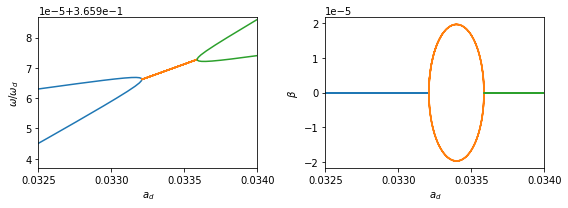

In [13]:
plt.subplots(1,2,figsize=(8,3))
plt.subplot(1,2,1)

plt.plot(pars,np.real(omegas)/(2*np.pi*argsdict['freq']))
plt.plot(pars3,np.real(omegas3)/(2*np.pi*argsdict['freq']))
plt.plot(pars5,np.real(omegas5)/(2*np.pi*argsdict['freq']))

plt.xlabel('$a_d$')
plt.ylabel(r'$\omega/\omega_d$')
plt.xlim(0.0325,0.034)
plt.gca().set_xticks(plt.gca().get_xticks()[::1])
plt.ylim(3.6765/(2*np.pi*argsdict['freq']),3.677/(2*np.pi*argsdict['freq']))

plt.subplot(1,2,2)
plt.ylabel(r'$\beta$')
plt.plot(pars,np.imag(omegas))
plt.plot(pars3,np.imag(omegas3))
plt.plot(pars5,np.imag(omegas5))
plt.xlim(0.0325,0.034)
plt.gca().set_xticks(plt.gca().get_xticks()[::1])


plt.xlabel('$a_d$')
plt.tight_layout()
plt.savefig('anharmonic.pdf')

plt.show()

## Continuation of subharmonic critical driving

### Inviscid instability boundary

In [14]:
imp.reload(viscid)
k0=kxs1[-4]
argsdict['ad']=0
argsdict['h0']=1.0
argsdict['As']=0.8
argsdict['kx']=k0
argsdict['ky']=0
argsdict['Nx']=3
argsdict['Ny']=3
argsdict['Nt']=3
argsdict['dim']=2
argsdict['verbose']=1
argsdict['dsmin']=1E-12
argsdict['epsl']=1E-6
argsdict['epsu']=1E-6
lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)

def mat(ad,argsdict):
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    omega=argsdict['freq']*2*np.pi/2
    return (E.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F.reshape(shape))+ad*D.reshape(shape)).reshape((n_flat,n_flat)).T
def mat2(ad,argsdict):
    E,F,D=viscid.inviscid_mat(argsdict)
    return D.T
def mat3(ad,argsdict):
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    omega=argsdict['freq']*2*np.pi/2
    return (-2*(2*np.pi/2+ls*2*np.pi)*(omega+ls*argsdict['freq']*2*np.pi)*(F.reshape(shape))).reshape((n_flat,n_flat)).T


[1.29934426 1.65912792]


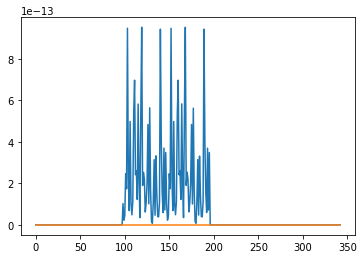

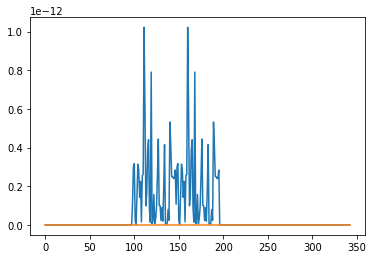

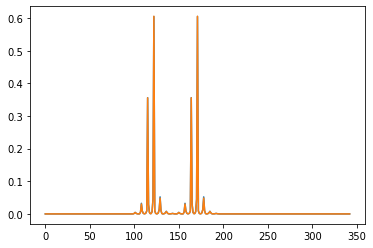

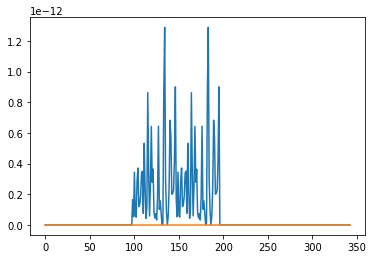

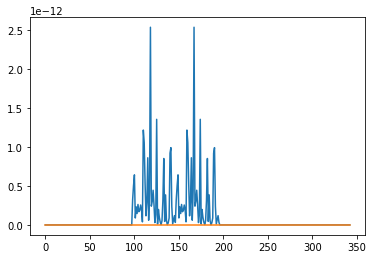

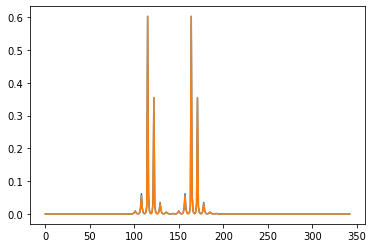

In [15]:
F,G=viscid.inviscid_mat_undriven(argsdict)
evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
order=np.argsort(np.real(evals))
freq0s=np.real(evals[order[:2]]**0.5/(2*np.pi/2))
print(freq0s)

ad0s=[]
vn0s=[]
wn0s=[]
for j in range(2):
    freq0=freq0s[j]
    argsdict['freq']=freq0
    v0=np.zeros((1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),dtype=np.complex128)
    w0=np.zeros((1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),dtype=np.complex128)
    v0[0,argsdict['Nt']]=revecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    v0[0,argsdict['Nt']-1]=revecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    w0[0,argsdict['Nt']]=levecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    w0[0,argsdict['Nt']-1]=levecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    v0=v0.ravel()
    w0=w0.ravel()
    ad0=0
    E1,F1,D1=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    omega=argsdict['freq']*2*np.pi/2
    E=(E1.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F1.reshape(shape))).reshape((n_flat,n_flat))
    F=(D1.reshape(shape)).reshape((n_flat,n_flat))

    ad0s=ad0s+[0]
    vn0s=vn0s+[v0]
    wn0s=wn0s+[w0]

    plt.plot(np.abs(E.T.dot(vn0s[j])))
    plt.plot(np.abs(ad0s[j]*F.T.dot(vn0s[j])))
    plt.show()
    plt.plot(np.abs(E.dot(wn0s[j])))
    plt.plot(np.abs(ad0s[j]*F.dot(wn0s[j])))
    plt.show()
    plt.plot(np.abs(vn0s[j]))
    plt.plot(np.abs(wn0s[j]))
    plt.show()

In [16]:
imp.reload(viscid)
start=timeit.default_timer()
iadssweep=[]
ifreqsweep=[]
ivssweep=[]
iwssweep=[]
idirsweep=[]
argsdict['verbose']=0
ds=5E-3
argsdict['lambdamax']=0.5
argsdict['dsmax']=ds
argsdict['ds']=ds
argsdict['dsmin']=1E-6
argsdict['epsl']=1E-4
argsdict['epsu']=1E-4
argsdict['Nsteps']=500

ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])
# argsdict['verbose']=1
# ks=ks[:1]
print(ks)
print(len(ks))

for j in range(2):
    ad0=ad0s[j]
    vs0=vn0s[j]
    ws0=wn0s[j]
    freq0=freq0s[j]
    
    argsdict['freq']=freq0
    argsdict['kx']=ks[0][0]
    argsdict['ky']=ks[0][1]
    for i in range(len(ks)):
        kx=ks[i][0]
        ky=ks[i][1]
        print(i,freq0,kx,ky)

        argsdict['freq']=freq0
        if(argsdict['kx']!=kx):
            argsdict['par']='kx'
            argsdict['pari']=np.min([kx,argsdict['kx']])
            argsdict['parf']=np.max([kx,argsdict['kx']])
            argsdict['ds']=np.sign(kx-argsdict['kx'])*1E-3
            ads1,vs1,ws1,pars1,dirs1=viscid.pseudocont2(ad0, vs0, ws0, mat, argsdict, mat2)
            argsdict['kx']=kx
            ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
            ad0=ads1[-1]
            vs0=vs1[-1]
            ws0=ws1[-1]
        if(argsdict['ky']!=ky):
            argsdict['par']='ky'
            argsdict['pari']=np.min([ky,argsdict['ky']])
            argsdict['parf']=np.max([ky,argsdict['ky']])
            argsdict['ds']=np.sign(ky-argsdict['ky'])*1E-3
            ads1,vs1,ws1,pars1,dirs1=viscid.pseudocont2(ad0, vs0, ws0, mat, argsdict, mat2)
            argsdict['ky']=ky
            ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
            ad0=ads1[-1]
            vs0=vs1[-1]
            ws0=ws1[-1]

        argsdict['freq']=freq0
        argsdict['par']='freq'
        argsdict['pari']=freq0-0.3
        argsdict['parf']=freq0+0.3
        argsdict['ds']=ds
        ads2,vs2,ws2,pars2,dirs2=viscid.pseudocont2(ad0, vs0, ws0, mat, argsdict, mat2, mat3)
        argsdict['freq']=freq0
        argsdict['ds']=-ds
        ads3,vs3,ws3,pars3,dirs3=viscid.pseudocont2(ad0, vs0, ws0, mat, argsdict, mat2, mat3)

        ifreqsweep=ifreqsweep+[np.flip(pars3).tolist()+pars2]
        iadssweep=iadssweep+[np.flip(ads3).tolist()+ads2]
        ivssweep=ivssweep+[np.flip(vs3,axis=0).tolist()+vs2]
        iwssweep=iwssweep+[np.flip(ws3,axis=0).tolist()+ws2]
        idirsweep=idirsweep+[np.flip(dirs3,axis=0).tolist()+dirs2]

        ind=np.argmin(np.abs(iadssweep[-1]))
        ad0=iadssweep[-1][ind]
        vs0=np.array(ivssweep[-1][ind])
        ws0=np.array(iwssweep[-1][ind])
        freq0=ifreqsweep[-1][ind]
        print(ifreqsweep[-1][0],ifreqsweep[-1][-1],freq0,ad0)

        stop=timeit.default_timer()
        print(stop-start)

[[0.14765485 0.        ]
 [0.15079645 0.        ]
 [0.15393804 0.        ]
 [0.15707963 0.        ]
 [0.15707963 0.0018138 ]
 [0.15707963 0.009069  ]
 [0.15707963 0.01632419]
 [0.15707963 0.02357939]
 [0.15707963 0.03083459]
 [0.15707963 0.03808979]
 [0.15707963 0.04534498]
 [0.15707963 0.05260018]
 [0.15707963 0.05985538]
 [0.15707963 0.06711058]
 [0.15707963 0.07436577]
 [0.15707963 0.08162097]
 [0.15707963 0.08887617]]
17
0 1.299344256168001 0.14765485471872028 0.0
0.9979652580648195 1.6016606646642226 1.299344256168001 0j
15.49174224800663
1 1.299344256168001 0.15079644737231007 0.0
0.9992558080913941 1.6000036119043692 1.3103146685621008 (-0.0016297195097708505+0j)
35.10710552503588
2 1.3103146685621008 0.15393804002589986 0.0
1.0087742698509177 1.611930948532122 1.3185715269360954 (-0.0007124951594799856+0j)
54.21710265905131
3 1.3185715269360954 0.15707963267948966 0.0
1.0162931430453954 1.6200784786159637 1.3213255981619962 (-0.000558790449565995+0j)
74.57942158001242
4 1.32132

In [17]:
for i in range(len(iadssweep)):
    np.save('data/bandgap/i%iads.npy'%(i),iadssweep[i])
    np.save('data/bandgap/i%ivs.npy'%(i),ivssweep[i])
    np.save('data/bandgap/i%iws.npy'%(i),iwssweep[i])
    np.save('data/bandgap/i%ifreqs.npy'%(i),ifreqsweep[i])

In [18]:
# ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])

# iadssweep=[np.load('data/bandgap/i%iads.npy'%(i)) for i in range(2*len(ks))]
# ivssweep=[np.load('data/bandgap/i%ivs.npy'%(i)) for i in range(2*len(ks))]
# iwssweep=[np.load('data/bandgap/i%iws.npy'%(i)) for i in range(2*len(ks))]
# ifreqsweep=[np.load('data/bandgap/i%ifreqs.npy'%(i)) for i in range(2*len(ks))]

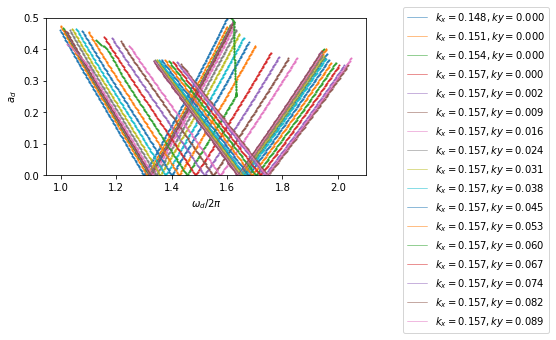

In [19]:
plt.figure(figsize=(8,4))
for i in range(len(ks)):
#     print(i)
    plt.plot(ifreqsweep[i],np.abs(np.real(iadssweep[i])),c=colors[i%len(colors)],lw=0.5)
    plt.scatter(ifreqsweep[i],np.abs(np.real(iadssweep[i])),c=colors[i%len(colors)],s=1)
#     plt.show()
for i in range(len(ks)):
#     print(i)
    plt.plot(ifreqsweep[i+len(ks)],np.abs(np.real(iadssweep[i+len(ks)])),c=colors[i%len(colors)],lw=0.5,label='$k_x=%.3f, ky=%.3f$'%(ks[i][0],ks[i][1]))
    plt.scatter(ifreqsweep[i+len(ks)],np.abs(np.real(iadssweep[i+len(ks)])),c=colors[i%len(colors)],s=1)
#     plt.show()

plt.xlabel(r'$\omega_d/2\pi$')
plt.ylabel(r'$a_d$')
plt.ylim(0,0.5)
# plt.xlim(1.2,1.8)
plt.legend(bbox_to_anchor=(1.1,1.1),loc='upper left')
plt.tight_layout()

### Viscid instability boundary

In [20]:
imp.reload(viscid)
k0=kxs1[-4]
argsdict['ad']=0
argsdict['h0']=1.0
argsdict['As']=0.8
argsdict['kx']=k0
argsdict['ky']=0
argsdict['Nx']=3
argsdict['Ny']=3
argsdict['Nt']=3
argsdict['dim']=2
argsdict['verbose']=1
argsdict['dsmin']=1E-4
argsdict['epsl']=1E-4
argsdict['epsu']=1E-3

def mat0(omega,argsdict):
        E,F=viscid.viscid_mat2d(omega,argsdict)
        return (E-argsdict['ad']*F).T
def mat3(omega,argsdict):
        E,F=viscid.viscid_mat2d(omega,argsdict)
        return -F.T
def mat(ad,argsdict):
    E,F=viscid.viscid_mat2d(2*np.pi*argsdict['freq']/2,argsdict)
    return (E-ad*F).T
def mat2(ad,argsdict):
    E,F=viscid.viscid_mat2d(2*np.pi*argsdict['freq']/2,argsdict)
    return -F.T

In [21]:
freq0s=[1.3,1.65]

F,G=viscid.inviscid_mat_undriven(argsdict)
evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
order=np.argsort(evals)
omega=evals[order[j]]**0.5+1j*0
argsdict['verbose']=1
argsdict['lambdamax']=np.inf
argsdict['ds']=1E-3

ads01=[]
ads02=[]
vs01=[]
vs02=[]
ws01=[]
ws02=[]
omegas01=[]
omegas02=[]

start=timeit.default_timer()
for j in range(2):
    v=np.zeros((3,(2*argsdict['Nt']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1)),np.complex128)
    w=np.zeros((3,(2*argsdict['Nt']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1)),np.complex128)
    v[2,argsdict['Nt']]=revecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
    w[2,argsdict['Nt']]=levecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
    v=v.ravel()
    w=w.ravel()
    
    freq0=freq0s[j]
    argsdict['freq']=freq0
    argsdict['ad']=0

    #starting frequency and driving
    omegas,vs,ws=viscid.rayleigh_mat(omega,v,np.conjugate(w),mat0,argsdict)
    omega0=omegas[-1]
    v0=vs[-1]
    w0=ws[-1]
    argsdict['par']='ad'
    argsdict['pari']=0
    argsdict['parf']=0.2
    omegas,vs,ws,pars,dirs=viscid.pseudocont2(omega0,v0,w0,mat0,argsdict,mat3=mat3)
    omegas01=omegas01+[omegas]
    vs01=vs01+[vs]
    ws01=ws01+[ws]
    ads01=ads01+[pars]
    
    ind=np.argmax(pars)
    fomega=interp1d(np.arange(len(omegas)),omegas,kind='cubic')
    fv=interp1d(np.arange(len(omegas)),np.array(vs).T,kind='cubic')
    fw=interp1d(np.arange(len(omegas)),np.array(ws).T,kind='cubic')
    fpar=interp1d(np.arange(len(omegas)),pars,kind='cubic')
    fdir=interp1d(np.arange(len(omegas)),np.array(dirs).T,kind='cubic')

    if pars[ind-2]<pars[ind] and pars[ind+2]<pars[ind]:
        find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-1,ind+1)).x
    else:
        find=minimize_scalar(lambda x: fpar(x),bracket=(ind-1,ind+1)).x

    omega0=complex(fomega(find))
    v0=fv(find)
    w0=fw(find)
    dir0=fdir(find)
    s=3*(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    newdir=np.zeros(dir0.shape)
    newdir[:s]=dir0[s:2*s]
    newdir[s:2*s]=-dir0[:s]
    newdir[2*s]=dir0[2*s+1]
    newdir[2*s+1]=-dir0[2*s]
    newdir[2*s+2]=2*dir0[2*s+2]
    dir0=newdir
    argsdict['ad']=fpar(find)
    print(ind,argsdict['ad'],omega0)
    omegas,vs,ws,pars,dirs=viscid.pseudocont2(omega0,v0,w0,mat0,argsdict,mat3=mat3,dir=dir0)
    omegas02=omegas02+[omegas]
    vs02=vs02+[vs]
    ws02=ws02+[ws]
    ads02=ads02+[pars]
    
stop=timeit.default_timer()
print(stop-start)

n=0 dv=1.617854e-01 dw=7.071068e-01 dl=2.517160e-01
n=1 dv=1.628130e-01 dw=1.884834e-02 dl=9.493748e-02
n=2 dv=7.881606e-03 dw=1.248549e-02 dl=1.026663e-01
n=3 dv=5.185580e-03 dw=1.332092e-02 dl=9.267884e-03
n=4 dv=1.950615e-04 dw=1.337422e-03 dl=4.408602e-03
newdir=(0.000,0.000,1.000)
step=0 ds=1.000000e-03 ad=0.000000 lambda=3.979384+i0.110542 dir=(0.000, 0.000, 1.000)
n=0 dv=1.193e-05 dlambda=2.172e-05 dmu=5.341e-12 ad=0.001000 lr=3.979432 li=0.110639 mstp=5.799e-03
m=0 direrr=4.789e-08 res=2.242e-11
deltadir=1.997e-04 stp=(0.048,0.097,1.000) newdir=(0.010, 0.000, 1.000)
ds=1.000e-03 ad=0.001000 lambda=3.979432+0.110639i stp=(0.048,0.097,1.000) mstp=5.799e-03
step=1 ds=1.000000e-03 ad=0.001000 lambda=3.979432+i0.110639 dir=(0.010, 0.000, 1.000)
n=0 dv=6.147e-06 dlambda=9.580e-07 dmu=4.551e-08 ad=0.002000 lr=3.979446 li=0.110639 mstp=1.139e-05
m=0 direrr=6.182e-08 res=1.890e-11
deltadir=2.698e-06 stp=(0.014,-0.000,1.000) newdir=(0.019, 0.000, 1.000)
ds=2.000e-03 ad=0.002000 lambda=3.

n=1 dv=1.323e-05 dlambda=2.144e-08 dmu=8.216e-08 ad=0.075328 lr=4.011407 li=0.110646 mstp=1.142e-03
m=0 direrr=1.001e-06 res=2.815e-09
deltadir=2.916e-03 stp=(0.703,0.000,0.712) newdir=(0.719, 0.000, 0.695)
ds=5.000e-03 ad=0.075328 lambda=4.011407+0.110646i stp=(0.703,0.000,0.712) mstp=1.142e-03
step=20 ds=5.000000e-03 ad=0.075328 lambda=4.011407+i0.110646 dir=(0.703, 0.000, 0.712)
n=0 dv=2.878e-04 dlambda=3.389e-05 dmu=1.559e-04 ad=0.078718 lr=4.015089 li=0.110647 mstp=1.142e-03
n=1 dv=1.524e-05 dlambda=4.049e-08 dmu=1.044e-07 ad=0.078718 lr=4.015089 li=0.110647 mstp=1.143e-03
m=0 direrr=1.111e-06 res=1.106e-08
deltadir=2.902e-03 stp=(0.737,0.000,0.678) newdir=(0.752, 0.000, 0.659)
ds=5.000e-03 ad=0.078718 lambda=4.015089+0.110647i stp=(0.737,0.000,0.678) mstp=1.143e-03
step=21 ds=5.000000e-03 ad=0.078718 lambda=4.015089+i0.110647 dir=(0.736, 0.000, 0.677)
n=0 dv=2.856e-04 dlambda=3.219e-05 dmu=1.627e-04 ad=0.081928 lr=4.018930 li=0.110647 mstp=1.140e-03
n=1 dv=8.305e-06 dlambda=8.061

n=1 dv=4.869e-05 dlambda=1.396e-06 dmu=1.411e-07 ad=0.104594 lr=4.088693 li=0.110659 mstp=2.908e-04
m=0 direrr=1.917e-05 res=1.404e-08
deltadir=6.638e-04 stp=(0.999,0.011,-0.020) newdir=(0.999, -0.000, -0.044)
ds=5.000e-03 ad=0.104594 lambda=4.088693+0.110659i stp=(0.999,0.011,-0.020) mstp=2.908e-04
step=37 ds=5.000000e-03 ad=0.104594 lambda=4.088693+i0.110659 dir=(0.999, -0.000, -0.044)
n=0 dv=1.345e-04 dlambda=1.589e-06 dmu=1.083e-04 ad=0.104253 lr=4.093681 li=0.110653 mstp=2.871e-04
n=1 dv=2.367e-05 dlambda=4.641e-07 dmu=1.621e-07 ad=0.104253 lr=4.093680 li=0.110651 mstp=2.872e-04
m=0 direrr=1.588e-05 res=2.648e-08
deltadir=7.784e-04 stp=(0.997,-0.002,-0.068) newdir=(0.996, 0.002, -0.092)
ds=5.000e-03 ad=0.104253 lambda=4.093680+0.110651i stp=(0.997,-0.002,-0.068) mstp=2.872e-04
step=38 ds=5.000000e-03 ad=0.104253 lambda=4.093680+i0.110651 dir=(0.996, 0.002, -0.092)
n=0 dv=1.464e-04 dlambda=2.592e-06 dmu=1.083e-04 ad=0.103674 lr=4.098647 li=0.110654 mstp=2.894e-04
n=1 dv=1.087e-05 d

n=0 dv=2.936e-04 dlambda=3.278e-05 dmu=1.582e-04 ad=0.068518 lr=4.163182 li=0.110645 mstp=1.143e-03
n=1 dv=8.158e-06 dlambda=6.455e-08 dmu=7.208e-09 ad=0.068518 lr=4.163182 li=0.110645 mstp=1.141e-03
m=0 direrr=2.142e-06 res=2.805e-09
deltadir=4.593e-03 stp=(0.673,-0.000,-0.741) newdir=(0.654, -0.000, -0.756)
ds=5.000e-03 ad=0.068518 lambda=4.163182+0.110645i stp=(0.673,-0.000,-0.741) mstp=1.141e-03
step=54 ds=5.000000e-03 ad=0.068518 lambda=4.163182+i0.110645 dir=(0.672, -0.000, -0.740)
n=0 dv=2.960e-04 dlambda=3.432e-05 dmu=1.512e-04 ad=0.064655 lr=4.166366 li=0.110644 mstp=1.145e-03
n=1 dv=1.992e-05 dlambda=3.008e-08 dmu=3.398e-08 ad=0.064655 lr=4.166366 li=0.110644 mstp=1.144e-03
m=0 direrr=2.445e-06 res=3.637e-09
deltadir=4.565e-03 stp=(0.637,-0.000,-0.773) newdir=(0.617, -0.000, -0.787)
ds=5.000e-03 ad=0.064655 lambda=4.166366+0.110644i stp=(0.637,-0.000,-0.773) mstp=1.144e-03
step=55 ds=5.000000e-03 ad=0.064655 lambda=4.166366+i0.110644 dir=(0.636, -0.000, -0.772)
n=0 dv=2.981e-

n=0 dv=1.026e-04 dlambda=2.796e-06 dmu=3.430e-05 ad=0.104872 lr=4.084072 li=0.104580 mstp=2.041e-04
m=0 direrr=1.986e-06 res=2.603e-08
deltadir=2.643e-03 stp=(-0.002,-0.997,0.048) newdir=(0.002, -0.998, 0.058)
ds=4.000e-03 ad=0.104872 lambda=4.084072+0.104580i stp=(-0.002,-0.997,0.048) mstp=2.041e-04
step=4 ds=4.000000e-03 ad=0.104872 lambda=4.084072+i0.104580 dir=(-0.002, -0.999, 0.048)
n=0 dv=1.625e-04 dlambda=1.486e-06 dmu=1.028e-04 ad=0.105179 lr=4.084072 li=0.100588 mstp=4.042e-04
n=1 dv=2.050e-05 dlambda=7.553e-07 dmu=2.836e-08 ad=0.105179 lr=4.084069 li=0.100589 mstp=4.034e-04
m=0 direrr=2.251e-05 res=1.203e-08
deltadir=4.065e-03 stp=(-0.001,-0.998,0.077) newdir=(-0.000, -0.995, 0.095)
ds=4.000e-03 ad=0.105179 lambda=4.084069+0.100589i stp=(-0.001,-0.998,0.077) mstp=4.034e-04
step=5 ds=4.000000e-03 ad=0.105179 lambda=4.084069+i0.100589 dir=(-0.001, -0.997, 0.077)
n=0 dv=2.096e-04 dlambda=2.369e-06 dmu=1.344e-04 ad=0.105635 lr=4.084072 li=0.096611 mstp=6.937e-04
n=1 dv=1.216e-05 

m=0 direrr=4.109e-06 res=1.105e-08
deltadir=2.498e-01 stp=(-0.000,-0.845,0.535) newdir=(-0.000, -0.842, 0.540)
ds=5.000e-03 ad=0.136354 lambda=4.084069+0.023395i stp=(-0.000,-0.845,0.535) mstp=9.875e-05
step=22 ds=5.000000e-03 ad=0.136354 lambda=4.084069+i0.023395 dir=(-0.000, -0.845, 0.534)
n=0 dv=2.862e-04 dlambda=6.858e-06 dmu=4.832e-05 ad=0.139081 lr=4.084070 li=0.019204 mstp=8.489e-05
m=0 direrr=3.456e-06 res=5.163e-08
deltadir=2.688e-01 stp=(0.000,-0.838,0.545) newdir=(-0.000, -0.835, 0.550)
ds=5.000e-03 ad=0.139081 lambda=4.084070+0.019204i stp=(0.000,-0.838,0.545) mstp=8.489e-05
step=23 ds=5.000000e-03 ad=0.139081 lambda=4.084070+i0.019204 dir=(0.000, -0.838, 0.545)
n=0 dv=2.760e-04 dlambda=6.372e-06 dmu=4.358e-05 ad=0.141858 lr=4.084070 li=0.015045 mstp=7.052e-05
m=0 direrr=7.357e-06 res=4.026e-08
deltadir=2.852e-01 stp=(-0.000,-0.832,0.555) newdir=(0.000, -0.829, 0.560)
ds=5.000e-03 ad=0.141858 lambda=4.084070+0.015045i stp=(-0.000,-0.832,0.555) mstp=7.052e-05
step=24 ds=5.00

m=0 direrr=5.501e-07 res=2.716e-08
deltadir=4.185e-01 stp=(-0.000,-0.761,0.649) newdir=(0.000, -0.760, 0.650)
ds=5.000e-03 ad=0.200298 lambda=4.084070+-0.059792i stp=(-0.000,-0.761,0.649) mstp=4.802e-06
n=0 dv=7.428348e-03 dw=7.071067e-01 dl=8.591176e-05
n=1 dv=5.077163e-04 dw=1.605244e-02 dl=1.926508e-02
n=2 dv=1.935801e-04 dw=3.308864e-03 dl=1.386298e-04
n=3 dv=4.427410e-07 dw=2.762966e-06 dl=7.912472e-07
newdir=(-0.000,0.000,1.000)
step=0 ds=1.000000e-03 ad=0.000000 lambda=5.131124+i0.085864 dir=(-0.000, 0.000, 1.000)
n=0 dv=3.855e-05 dlambda=2.571e-06 dmu=2.260e-11 ad=0.001000 lr=5.131140 li=0.085864 mstp=1.242e-04
m=0 direrr=9.979e-09 res=3.434e-10
deltadir=1.309e-04 stp=(0.016,0.000,1.000) newdir=(0.032, 0.000, 0.999)
ds=1.000e-03 ad=0.001000 lambda=5.131140+0.085864i stp=(0.016,0.000,1.000) mstp=1.242e-04
step=1 ds=1.000000e-03 ad=0.001000 lambda=5.131140+i0.085864 dir=(0.032, 0.000, 0.999)
n=0 dv=3.863e-05 dlambda=2.572e-06 dmu=4.975e-07 ad=0.001999 lr=5.131187 li=0.085864 mstp

n=0 dv=1.116e-03 dlambda=5.636e-06 dmu=3.570e-04 ad=0.040779 lr=5.184448 li=0.085867 mstp=2.777e-03
n=1 dv=3.228e-05 dlambda=5.339e-07 dmu=2.363e-08 ad=0.040779 lr=5.184450 li=0.085864 mstp=2.778e-03
m=0 direrr=2.120e-05 res=4.625e-08
deltadir=7.561e-04 stp=(1.002,-0.000,0.025) newdir=(1.000, 0.002, -0.012)
ds=5.000e-03 ad=0.040779 lambda=5.184450+0.085864i stp=(1.002,-0.000,0.025) mstp=2.778e-03
step=18 ds=5.000000e-03 ad=0.040779 lambda=5.184450+i0.085864 dir=(1.000, 0.002, -0.012)
n=0 dv=5.609e-04 dlambda=1.284e-06 dmu=1.783e-04 ad=0.040532 lr=5.189448 li=0.085865 mstp=6.890e-04
n=1 dv=3.268e-06 dlambda=2.648e-08 dmu=2.876e-08 ad=0.040532 lr=5.189448 li=0.085865 mstp=6.887e-04
m=0 direrr=2.755e-07 res=1.967e-07
deltadir=3.791e-03 stp=(1.000,0.000,-0.049) newdir=(0.996, -0.000, -0.086)
ds=5.000e-03 ad=0.040532 lambda=5.189448+0.085865i stp=(1.000,0.000,-0.049) mstp=6.887e-04
step=19 ds=5.000000e-03 ad=0.040532 lambda=5.189448+i0.085865 dir=(0.999, 0.000, -0.049)
n=0 dv=1.135e-03 dlam

n=0 dv=5.497e-05 dlambda=6.552e-07 dmu=1.413e-05 ad=0.040813 lr=5.183628 li=0.083865 mstp=1.161e-04
m=0 direrr=7.521e-07 res=4.470e-08
deltadir=7.338e-05 stp=(0.000,-1.000,0.022) newdir=(0.000, -1.000, 0.030)
ds=2.000e-03 ad=0.040813 lambda=5.183628+0.083865i stp=(0.000,-1.000,0.022) mstp=1.161e-04
step=2 ds=2.000000e-03 ad=0.040813 lambda=5.183628+i0.083865 dir=(0.000, -1.000, 0.030)
n=0 dv=1.926e-04 dlambda=1.604e-07 dmu=2.828e-05 ad=0.040902 lr=5.183627 li=0.081867 mstp=1.085e-04
m=0 direrr=9.516e-06 res=8.414e-08
deltadir=4.350e-03 stp=(-0.000,-0.999,0.044) newdir=(-0.000, -0.998, 0.059)
ds=2.000e-03 ad=0.040902 lambda=5.183627+0.081867i stp=(-0.000,-0.999,0.044) mstp=1.085e-04
step=3 ds=2.000000e-03 ad=0.040902 lambda=5.183627+i0.081867 dir=(-0.000, -0.999, 0.044)
n=0 dv=1.880e-04 dlambda=4.551e-07 dmu=5.601e-05 ad=0.041049 lr=5.183628 li=0.079871 mstp=4.257e-04
m=0 direrr=7.436e-06 res=7.985e-08
deltadir=7.550e-03 stp=(0.000,-0.998,0.073) newdir=(0.000, -0.996, 0.088)
ds=4.000e-0

m=0 direrr=7.276e-07 res=7.174e-08
deltadir=5.462e-01 stp=(-0.000,-0.844,0.536) newdir=(-0.000, -0.842, 0.540)
ds=5.000e-03 ad=0.072248 lambda=5.183628+0.009106i stp=(-0.000,-0.844,0.536) mstp=4.111e-05
step=20 ds=5.000000e-03 ad=0.072248 lambda=5.183628+i0.009106 dir=(-0.000, -0.844, 0.536)
n=0 dv=5.153e-04 dlambda=3.483e-06 dmu=3.132e-05 ad=0.074964 lr=5.183628 li=0.004907 mstp=3.197e-05
m=0 direrr=2.902e-06 res=5.582e-08
deltadir=5.691e-01 stp=(-0.000,-0.840,0.543) newdir=(0.000, -0.838, 0.546)
ds=5.000e-03 ad=0.074964 lambda=5.183628+0.004907i stp=(-0.000,-0.840,0.543) mstp=3.197e-05
step=21 ds=5.000000e-03 ad=0.074964 lambda=5.183628+i0.004907 dir=(-0.000, -0.840, 0.543)
n=0 dv=4.615e-04 dlambda=3.093e-06 dmu=2.736e-05 ad=0.077709 lr=5.183628 li=0.000728 mstp=2.473e-05
m=0 direrr=1.404e-06 res=7.872e-08
deltadir=5.891e-01 stp=(-0.000,-0.836,0.549) newdir=(-0.000, -0.834, 0.552)
ds=5.000e-03 ad=0.077709 lambda=5.183628+0.000728i stp=(-0.000,-0.836,0.549) mstp=2.473e-05
step=22 ds=5

m=0 direrr=1.219e-06 res=9.389e-08
deltadir=6.320e-01 stp=(-0.000,-0.804,0.595) newdir=(-0.000, -0.804, 0.595)
ds=5.000e-03 ad=0.132758 lambda=5.183628+-0.076684i stp=(-0.000,-0.804,0.595) mstp=7.616e-07
step=41 ds=5.000000e-03 ad=0.132758 lambda=5.183628+i-0.076684 dir=(-0.000, -0.804, 0.595)
n=0 dv=8.610e-05 dlambda=5.576e-07 dmu=4.203e-06 ad=0.135736 lr=5.183628 li=-0.080700 mstp=6.940e-07
m=0 direrr=6.788e-06 res=4.573e-07
deltadir=6.235e-01 stp=(-0.000,-0.803,0.596) newdir=(0.000, -0.803, 0.596)
ds=5.000e-03 ad=0.135736 lambda=5.183628+-0.080700i stp=(-0.000,-0.803,0.596) mstp=6.940e-07
step=42 ds=5.000000e-03 ad=0.135736 lambda=5.183628+i-0.080700 dir=(-0.000, -0.803, 0.596)
n=0 dv=8.049e-05 dlambda=5.155e-07 dmu=3.604e-06 ad=0.138718 lr=5.183628 li=-0.084714 mstp=5.404e-07
m=0 direrr=2.999e-06 res=2.206e-07
deltadir=6.143e-01 stp=(-0.000,-0.803,0.596) newdir=(0.000, -0.802, 0.597)
ds=5.000e-03 ad=0.138718 lambda=5.183628+-0.084714i stp=(-0.000,-0.803,0.596) mstp=5.404e-07
step=4

m=0 direrr=3.998e-07 res=7.388e-07
deltadir=3.601e-01 stp=(0.000,-0.795,0.606) newdir=(0.000, -0.795, 0.606)
ds=5.000e-03 ad=0.195937 lambda=5.183628+-0.160550i stp=(0.000,-0.795,0.606) mstp=7.633e-08
step=62 ds=5.000000e-03 ad=0.195937 lambda=5.183628+i-0.160550 dir=(0.000, -0.795, 0.606)
n=0 dv=4.427e-05 dlambda=3.328e-07 dmu=1.525e-06 ad=0.198969 lr=5.183628 li=-0.164525 mstp=1.518e-07
m=0 direrr=3.028e-06 res=3.088e-06
deltadir=3.461e-01 stp=(-0.000,-0.795,0.606) newdir=(0.000, -0.795, 0.607)
ds=5.000e-03 ad=0.198969 lambda=5.183628+-0.164525i stp=(-0.000,-0.795,0.606) mstp=1.518e-07
step=63 ds=5.000000e-03 ad=0.198969 lambda=5.183628+i-0.164525 dir=(-0.000, -0.795, 0.606)
n=0 dv=5.729e-05 dlambda=2.446e-07 dmu=1.120e-06 ad=0.202003 lr=5.183628 li=-0.168500 mstp=8.220e-08
m=0 direrr=2.552e-06 res=7.837e-07
deltadir=3.316e-01 stp=(0.000,-0.795,0.607) newdir=(-0.000, -0.795, 0.607)
ds=5.000e-03 ad=0.202003 lambda=5.183628+-0.168500i stp=(0.000,-0.795,0.607) mstp=8.220e-08
188.6911341

n=0 dv=8.644221e-05 dw=2.028225e-03 dl=8.254845e-04
n=1 dv=3.187105e-05 dw=3.651223e-04 dl=2.257650e-06
n=0 dv=4.851307e-05 dw=6.189176e-04 dl=4.468612e-04
n=1 dv=3.636821e-05 dw=3.577007e-04 dl=4.853609e-07


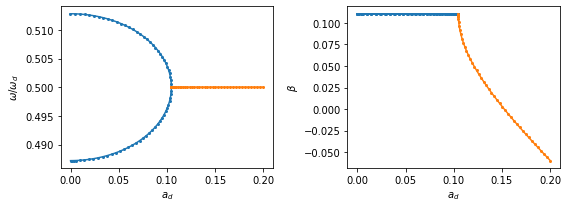

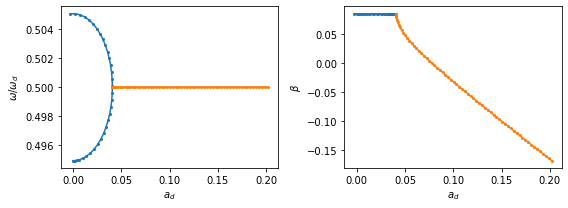

In [22]:
ad0s=[]
vn0s=[]
wn0s=[]
argsdict['epsu']=1E-3

for j in range(2):
    ind=np.argmin(np.abs(np.imag(omegas02[j])))
    argsdict['freq']=freq0s[j]
    ads,vs,ws=viscid.rayleigh_mat(ads02[j][ind],vs02[j][ind],ws02[j][ind],mat,argsdict,mat2)
    ad0s=ad0s+[ads[-1]]
    vn0s=vn0s+[vs[-1]]
    wn0s=wn0s+[ws[-1]]
    
for j in range(2):
    
    plt.subplots(1,2,figsize=(8,3))
    plt.subplot(1,2,1)
    plt.plot(ads01[j],np.real(omegas01[j])/(2*np.pi*freq0s[j]),marker='o',ms=2)
    plt.plot(ads02[j],np.real(omegas02[j])/(2*np.pi*freq0s[j]),marker='o',ms=2)
    plt.xlabel('$a_d$')
    plt.ylabel(r'$\omega/\omega_d$')

    plt.subplot(1,2,2)
    plt.plot(ads01[j],np.imag(omegas01[j]),marker='o',ms=2)
    plt.plot(ads02[j],np.imag(omegas02[j]),marker='o',ms=2)
    plt.ylabel(r'$\beta$')
    plt.xlabel('$a_d$')

    plt.tight_layout()
    plt.show()


[(0.15243644213382293+3.4609691515692004e-07j), (0.07819134567357569-3.526328982013426e-08j)]


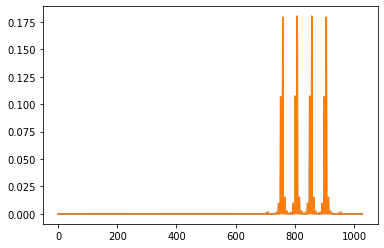

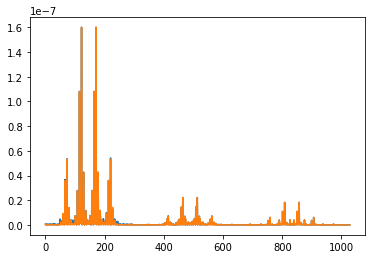

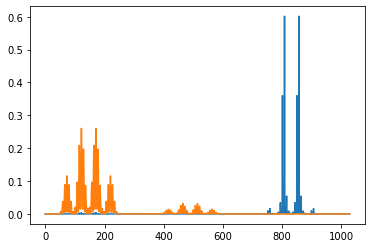

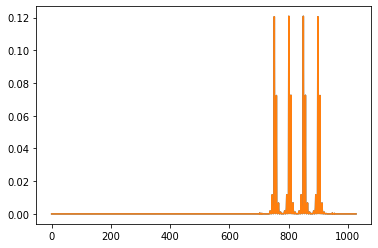

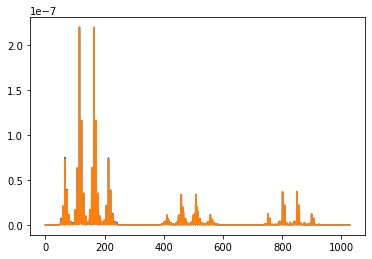

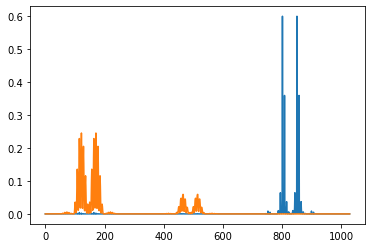

In [23]:
print(ad0s)
for j in range(2):
    argsdict['freq']=freq0s[j]
    E,F=viscid.viscid_mat2d(2*np.pi*argsdict['freq']/2,argsdict)

    plt.plot(np.abs(E.T.dot(vn0s[j])))
    plt.plot(np.abs(ad0s[j]*F.T.dot(vn0s[j])))
    plt.show()
    plt.plot(np.abs(E.dot(wn0s[j])))
    plt.plot(np.abs(ad0s[j]*F.dot(wn0s[j])))
    plt.show()
    plt.plot(np.abs(vn0s[j]))
    plt.plot(np.abs(wn0s[j]))
    plt.show()


In [ ]:
imp.reload(viscid)
start=timeit.default_timer()
adssweep=[]
freqsweep=[]
vssweep=[]
wssweep=[]
dirsweep=[]
argsdict['verbose']=0
argsdict['lambdamax']=0.55

ds=2E-3
argsdict['dsmax']=ds
argsdict['ds']=ds/10
argsdict['dsmin']=1E-6

argsdict['epsu']=1E-2
argsdict['epsl']=1E-4
argsdict['itmax']=10

ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])
argsdict['verbose']=1
ks=ks[:1]

print(ks)
print(len(ks))

for j in range(2):
    ad0=ad0s[j]
    vs0=vn0s[j]
    ws0=wn0s[j]
    freq0=freq0s[j]
    
    argsdict['freq']=freq0
    argsdict['kx']=ks[0][0]
    argsdict['ky']=ks[0][1]
    for i in range(len(ks)):
        kx=ks[i][0]
        ky=ks[i][1]
        print(i,freq0,kx,ky)
        argsdict['freq']=freq0
        if(argsdict['kx']!=kx):
            argsdict['par']='kx'
            argsdict['pari']=np.min([kx,argsdict['kx']])
            argsdict['parf']=np.max([kx,argsdict['kx']])
            
            argsdict['ds']=np.sign(kx-argsdict['kx'])*1E-4
            ads1,vs1,ws1,pars1,dirs1=viscid.pseudocont2(ad0, vs0, ws0, mat, argsdict, mat2)
            argsdict['kx']=kx
            ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
            ad0=ads1[-1]
            vs0=vs1[-1]
            ws0=ws1[-1]
        if(argsdict['ky']!=ky):
            argsdict['par']='ky'
            argsdict['pari']=np.min([ky,argsdict['ky']])
            argsdict['parf']=np.max([ky,argsdict['ky']])

            argsdict['ds']=np.sign(ky-argsdict['ky'])*1E-4
            ads1,vs1,ws1,pars1,dirs1=viscid.pseudocont2(ad0, vs0, ws0, mat, argsdict, mat2)
            argsdict['ky']=ky
            ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
            ad0=ads1[-1]
            vs0=vs1[-1]
            ws0=ws1[-1]

        argsdict['freq']=freq0
        argsdict['par']='freq'
        argsdict['pari']=freq0-0.25
        argsdict['parf']=freq0+0.25
        
        argsdict['ds']=ds/10
        ads2,vs2,ws2,pars2,dirs2=viscid.pseudocont2(ad0, vs0, ws0, mat, argsdict, mat2)
        argsdict['freq']=freq0        
        argsdict['ds']=-ds/10
        ads3,vs3,ws3,pars3,dirs3=viscid.pseudocont2(ad0, vs0, ws0, mat, argsdict, mat2) 

        freqsweep=freqsweep+[np.flip(pars3).tolist()+pars2]
        adssweep=adssweep+[np.flip(ads3).tolist()+ads2]
        vssweep=vssweep+[np.flip(vs3,axis=0).tolist()+vs2]
        wssweep=wssweep+[np.flip(ws3,axis=0).tolist()+ws2]
        dirsweep=dirsweep+[np.flip(dirs3,axis=0).tolist()+dirs2]

        ind=np.argmin(np.abs(adssweep[-1]))
        ad0=adssweep[-1][ind]
        vs0=np.array(vssweep[-1][ind])
        ws0=np.array(wssweep[-1][ind])
        freq0=freqsweep[-1][ind]
        print(freqsweep[-1][0],freqsweep[-1][-1],freq0,ad0)

        stop=timeit.default_timer()
        print(stop-start)


[[0.14765485 0.        ]
 [0.15079645 0.        ]
 [0.15393804 0.        ]
 [0.15707963 0.        ]
 [0.15707963 0.0018138 ]
 [0.15707963 0.009069  ]
 [0.15707963 0.01632419]
 [0.15707963 0.02357939]
 [0.15707963 0.03083459]
 [0.15707963 0.03808979]
 [0.15707963 0.04534498]
 [0.15707963 0.05260018]
 [0.15707963 0.05985538]
 [0.15707963 0.06711058]
 [0.15707963 0.07436577]
 [0.15707963 0.08162097]
 [0.15707963 0.08887617]]
17
0 1.3 0.14765485471872028 0.0
1.089998696122752 1.5502154052039292 1.266518556255025 (0.1100323109196765-4.9289288328952794e-08j)
490.13947163295234
1 1.266518556255025 0.15079644737231007 0.0
1.1003028603826894 1.4249054680957955 1.2770163065849538 (0.11077210007096716-5.6642064257541723e-08j)
879.9079724759795
2 1.2770163065849538 0.15393804002589986 0.0
1.1066527051438348 1.4263793980224053 1.2844433556596195 (0.11127213837563034+1.865010741999458e-07j)
1266.8240954729845
3 1.2844433556596195 0.15707963267948966 0.0
1.1086380370602946 1.4572536825279656 1.287214

In [ ]:
for i in range(len(adssweep)):
    np.save('data/bandgap/%iads.npy'%(i),adssweep[i])
    np.save('data/bandgap/%ivs.npy'%(i),vssweep[i])
    np.save('data/bandgap/%iws.npy'%(i),wssweep[i])
    np.save('data/bandgap/%ifreqs.npy'%(i),freqsweep[i])

In [ ]:
# ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])

# iadssweep=[np.load('data/bandgap/i%iads.npy'%(i)) for i in range(2*len(ks))]
# ivssweep=[np.load('data/bandgap/i%ivs.npy'%(i)) for i in range(2*len(ks))]
# iwssweep=[np.load('data/bandgap/i%iws.npy'%(i)) for i in range(2*len(ks))]
# ifreqsweep=[np.load('data/bandgap/i%ifreqs.npy'%(i)) for i in range(2*len(ks))]

# adssweep=[np.load('data/bandgap/%iads.npy'%(i)) for i in range(2*len(ks))]
# vssweep=[np.load('data/bandgap/%ivs.npy'%(i)) for i in range(2*len(ks))]
# wssweep=[np.load('data/bandgap/%iws.npy'%(i)) for i in range(2*len(ks))]
# freqsweep=[np.load('data/bandgap/%ifreqs.npy'%(i)) for i in range(2*len(ks))]

In [ ]:
plt.figure(figsize=(8,4))
for i in range(len(ks)):
    plt.plot(freqsweep[i],np.abs(np.real(adssweep[i])),c=colors[i%len(colors)])
    plt.scatter(freqsweep[i],np.abs(np.real(adssweep[i])),c=colors[i%len(colors)],s=5)
    plt.plot(ifreqsweep[i],np.abs(np.real(iadssweep[i])),c=colors[i%len(colors)],lw=0.5)
#     plt.scatter(ifreqsweep[i],np.abs(np.real(iadssweep[i])),c=colors[i%len(colors)],s=1)
#     plt.show()
for i in range(len(ks)):
    plt.plot(freqsweep[i+len(ks)],np.abs(np.real(adssweep[i+len(ks)])),c=colors[i%len(colors)],label='$k_x=%.3f, ky=%.3f$'%(ks[i][0],ks[i][1]))
    plt.scatter(freqsweep[i+len(ks)],np.abs(np.real(adssweep[i+len(ks)])),c=colors[i%len(colors)],s=5)
    plt.plot(ifreqsweep[i+len(ks)],np.abs(np.real(iadssweep[i+len(ks)])),c=colors[i%len(colors)],lw=0.5)
#     plt.scatter(ifreqsweep[i+len(ks)],np.abs(np.real(iadssweep[i+len(ks)])),c=colors[i%len(colors)],s=1)
#     plt.show()

plt.xlabel(r'$\omega_d/2\pi$')
plt.ylabel(r'$a_d$')
# plt.ylim(0,0.25)
# plt.xlim(1.2,1.8)
plt.legend(bbox_to_anchor=(1.1,1.1),loc='upper left')
plt.tight_layout()
# plt.savefig('boundaries.pdf')

In [ ]:
plt.figure(figsize=(8,4))
for i in range(len(ks)):
    print(i)
    plt.plot(freqsweep[i],np.abs(np.real(adssweep[i])),c=colors[i%len(colors)])
    plt.scatter(freqsweep[i],np.abs(np.real(adssweep[i])),c=colors[i%len(colors)],s=5)
    plt.plot(ifreqsweep[i],np.abs(np.real(iadssweep[i])),c=colors[i%len(colors)],lw=0.5)
    plt.scatter(ifreqsweep[i],np.abs(np.real(iadssweep[i])),c=colors[i%len(colors)],s=1)
    plt.show()
for i in range(len(ks)):
    print(i)
    plt.plot(freqsweep[i+len(ks)],np.abs(np.real(adssweep[i+len(ks)])),c=colors[i%len(colors)],label='$k_x=%.3f, ky=%.3f$'%(ks[i][0],ks[i][1]))
    plt.scatter(freqsweep[i+len(ks)],np.abs(np.real(adssweep[i+len(ks)])),c=colors[i%len(colors)],s=5)
    plt.plot(ifreqsweep[i+len(ks)],np.abs(np.real(iadssweep[i+len(ks)])),c=colors[i%len(colors)],lw=0.5)
    plt.scatter(ifreqsweep[i+len(ks)],np.abs(np.real(iadssweep[i+len(ks)])),c=colors[i%len(colors)],s=1)
    plt.show()

# plt.xlabel(r'$\omega_d/2\pi$')
# plt.ylabel(r'$a_d$')
